# Triển khai dự án: Agoda Sentiment Analysis
## 1. Business Understanding

## 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np

### A. File hotel_profiles.csv: xử lý dữ liệu

In [2]:
data_profiles = pd.read_csv('Data_Agoda_raw/hotel_profiles.csv')
data_profiles

,num,Hotel ID,Hotel Name,Hotel Rank,Hotel Address,Total Score,Vị trí,Độ sạch sẽ,Dịch vụ,Tiện nghi,Đáng giá tiền,Sự thoải mái và chất lượng phòng
0,1,1_1,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5 sao trên 5,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam","8,8","9,4","8,9","8,9","8,7","8,7","8,3"
1,2,1_2,ALPHA BIRD NHA TRANG,4 sao trên 5,"51/19/37 Tue Tinh St, Loc Tho Ward, Nha Trang,...","7,7","7,8","7,6","8,1","7,5","8,1",NaN
2,3,1_3,Khách sạn Aaron (Aaron Hotel),3.5 sao trên 5,"6Trần Quang Khải, Lộc Thọ, Nha Trang, Việt Nam...","8,5","8,9","8,7","8,8","8,1","8,5",NaN
3,4,1_4,Panorama Star Beach Nha Trang,5 sao trên 5,"02 Nguyen Thi Minh Khai, Lộc Thọ, Nha Trang, V...","8,8","9,6","8,9","8,9","8,7","9,0",NaN
4,5,1_5,Khách sạn Balcony Nha Trang (Balcony Nha Trang...,4 sao trên 5,"98B/13 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam","8,4","8,5","8,7","8,5","8,3","8,6","8,7"
...,...,...,...,...,...,...,...,...,...,...,...,...
1285,1286,43_26,Thanh Hien Villa,No information,"Khu Đô Thị Golden Bay Hưng Thịnh Thôn, Đèo Cù ...",No information,NaN,NaN,NaN,NaN,NaN,NaN
1286,1287,43_27,"Chung cư 64 m² 3 phòng ngủ, 2 phòng tắm riêng ...",No information,"Vĩnh Phước, Nha Trang, Việt Nam",No information,NaN,NaN,NaN,NaN,NaN,NaN
1287,1288,43_28,"Nhà riêng 214 m² 2 phòng ngủ, 3 phòng tắm riên...",No information,"Cam Hải Đông, Nha Trang, Việt Nam",No information,NaN,NaN,NaN,NaN,NaN,NaN
1288,1289,43_29,Khách sạn Thái Bình Cam Ranh (Thai Binh Cam Ra...,No information,"2013 Hung Vuong, Cam Ranh City, Khanh Hoa Prov...","8,2","8,2","8,7","8,6","8,2","8,5",NaN


##### Có 1290 hotel id, Hotel Rank và Total Score có "No Information", các điểm thành phần có nhiều NaN.
##### Thay No information thành NaN cho dễ tính.


In [3]:
# Replace "No information" with NaN 
data_profiles['Hotel Rank'] = data_profiles['Hotel Rank'].replace("No information", np.nan)
data_profiles['Total Score'] = data_profiles['Total Score'].replace("No information", np.nan)

In [4]:
# Check for duplicates
duplicates = data_profiles.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

# Check for NaN values
nan_values = data_profiles.isna().sum()
print(f'NaN values:\n{nan_values}')

Duplicate rows: 0
NaN values:
num                                    0
Hotel ID                               0
Hotel Name                             0
Hotel Rank                           889
Hotel Address                          0
Total Score                          647
Vị trí                               652
Độ sạch sẽ                           655
Dịch vụ                              742
Tiện nghi                            750
Đáng giá tiền                        660
Sự thoải mái và chất lượng phòng    1224
dtype: int64


##### Không có duplicate
##### Khá nhiều NaN ở các điểm thành phần.

In [5]:
data_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   num                               1290 non-null   int64 
 1   Hotel ID                          1290 non-null   object
 2   Hotel Name                        1290 non-null   object
 3   Hotel Rank                        401 non-null    object
 4   Hotel Address                     1290 non-null   object
 5   Total Score                       643 non-null    object
 6   Vị trí                            638 non-null    object
 7   Độ sạch sẽ                        635 non-null    object
 8   Dịch vụ                           548 non-null    object
 9   Tiện nghi                         540 non-null    object
 10  Đáng giá tiền                     630 non-null    object
 11  Sự thoải mái và chất lượng phòng  66 non-null     object
dtypes: int64(1), object(

#### Đổi kiểu dữ liệu

In [6]:
# Convert 'Hotel ID', 'Hotel Name', 'Hotel Address' to string
data_profiles['Hotel ID'] = data_profiles['Hotel ID'].astype(str)
data_profiles['Hotel Name'] = data_profiles['Hotel Name'].astype(str)
data_profiles['Hotel Address'] = data_profiles['Hotel Address'].astype(str)

# Convert 'Hotel Rank' from "X sao trên 5" to float
data_profiles['Hotel Rank'] = data_profiles['Hotel Rank'].astype(str)
data_profiles['Hotel Rank'] = data_profiles['Hotel Rank'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

# Convert columns to float after replacing commas with dots
columns_to_float = ['Total Score', 'Vị trí', 'Độ sạch sẽ', 'Dịch vụ', 'Tiện nghi', 
                    'Đáng giá tiền', 'Sự thoải mái và chất lượng phòng']

for column in columns_to_float:
    # Replace commas with dots and convert to float
    data_profiles[column] = data_profiles[column].str.replace(',', '.').astype(float)

# Check the changes
print(data_profiles.dtypes)

num                                   int64
Hotel ID                             object
Hotel Name                           object
Hotel Rank                          float64
Hotel Address                        object
Total Score                         float64
Vị trí                              float64
Độ sạch sẽ                          float64
Dịch vụ                             float64
Tiện nghi                           float64
Đáng giá tiền                       float64
Sự thoải mái và chất lượng phòng    float64
dtype: object


In [7]:
data_profiles

,num,Hotel ID,Hotel Name,Hotel Rank,Hotel Address,Total Score,Vị trí,Độ sạch sẽ,Dịch vụ,Tiện nghi,Đáng giá tiền,Sự thoải mái và chất lượng phòng
0,1,1_1,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
1,2,1_2,ALPHA BIRD NHA TRANG,4.0,"51/19/37 Tue Tinh St, Loc Tho Ward, Nha Trang,...",7.7,7.8,7.6,8.1,7.5,8.1,NaN
2,3,1_3,Khách sạn Aaron (Aaron Hotel),3.5,"6Trần Quang Khải, Lộc Thọ, Nha Trang, Việt Nam...",8.5,8.9,8.7,8.8,8.1,8.5,NaN
3,4,1_4,Panorama Star Beach Nha Trang,5.0,"02 Nguyen Thi Minh Khai, Lộc Thọ, Nha Trang, V...",8.8,9.6,8.9,8.9,8.7,9.0,NaN
4,5,1_5,Khách sạn Balcony Nha Trang (Balcony Nha Trang...,4.0,"98B/13 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.4,8.5,8.7,8.5,8.3,8.6,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1285,1286,43_26,Thanh Hien Villa,NaN,"Khu Đô Thị Golden Bay Hưng Thịnh Thôn, Đèo Cù ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1286,1287,43_27,"Chung cư 64 m² 3 phòng ngủ, 2 phòng tắm riêng ...",NaN,"Vĩnh Phước, Nha Trang, Việt Nam",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1287,1288,43_28,"Nhà riêng 214 m² 2 phòng ngủ, 3 phòng tắm riên...",NaN,"Cam Hải Đông, Nha Trang, Việt Nam",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1288,1289,43_29,Khách sạn Thái Bình Cam Ranh (Thai Binh Cam Ra...,NaN,"2013 Hung Vuong, Cam Ranh City, Khanh Hoa Prov...",8.2,8.2,8.7,8.6,8.2,8.5,NaN


##### Các giá trị NaN ở Hotel Rank (là các nhà trọ nhỏ, phòng cho thuê không được xếp loại sao) và các điểm thành phần bị NaN không ảnh hưởng đến quá trình phân tích.


### B. File hotel_comments.csv

In [8]:
data_comments = pd.read_csv('Data_Agoda_raw/hotel_comments.csv')
data_comments.head()

,num,Hotel ID,Reviewer ID,Reviewer Name,Nationality,Group Name,Room Type,Stay Details,Score,Score Level,Title,Body,Review Date
0,1,1_1,1_1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 3 đêm vào Tháng 7 năm 2023,"10,0",Trên cả tuyệt vời,Cao nhất‼︎”,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,Đã nhận xét vào 30 tháng 7 2023
1,2,1_1,1_1_2,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 1 đêm vào Tháng 9 năm 2022,"10,0",Trên cả tuyệt vời,Tháng 8”,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,Đã nhận xét vào 05 tháng 9 2022
2,3,1_1,1_1_3,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,Đã ở 1 đêm vào Tháng 6 năm 2024,"9,2",Trên cả tuyệt vời,Du lịch tại Nha Trang”,"Lần này đến với Nha Trang, tôi book phòng tại ...",Đã nhận xét vào 25 tháng 6 2024
3,4,1_1,1_1_4,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,Đã ở 3 đêm vào Tháng 6 năm 2024,"8,8",Tuyệt vời,Du lịch Nha Trang tại Mường Thanh”,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,Đã nhận xét vào 02 tháng 7 2024
4,5,1_1,1_1_5,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,Đã ở 1 đêm vào Tháng 6 năm 2024,"9,2",Trên cả tuyệt vời,Ks tốt !”,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,Đã nhận xét vào 16 tháng 6 2024


In [9]:
data_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80314 entries, 0 to 80313
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num            80314 non-null  int64 
 1   Hotel ID       80314 non-null  object
 2   Reviewer ID    80314 non-null  object
 3   Reviewer Name  80228 non-null  object
 4   Nationality    80314 non-null  object
 5   Group Name     80314 non-null  object
 6   Room Type      80314 non-null  object
 7   Stay Details   80314 non-null  object
 8   Score          80314 non-null  object
 9   Score Level    80314 non-null  object
 10  Title          80314 non-null  object
 11  Body           80272 non-null  object
 12  Review Date    80314 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.0+ MB


##### Có một số body bị trống (không viết review), thay giá trị trống bằng "Không nhận xét"

In [10]:
data_comments['Body'].fillna('Không bình luận', inplace=True)
data_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80314 entries, 0 to 80313
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num            80314 non-null  int64 
 1   Hotel ID       80314 non-null  object
 2   Reviewer ID    80314 non-null  object
 3   Reviewer Name  80228 non-null  object
 4   Nationality    80314 non-null  object
 5   Group Name     80314 non-null  object
 6   Room Type      80314 non-null  object
 7   Stay Details   80314 non-null  object
 8   Score          80314 non-null  object
 9   Score Level    80314 non-null  object
 10  Title          80314 non-null  object
 11  Body           80314 non-null  object
 12  Review Date    80314 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.0+ MB


##### Chuyển Score thành float

In [11]:
data_comments['Score'] = data_comments['Score'].str.replace(',', '.').astype(float)

##### Chuyển Review Date thành DateTime

In [12]:
import re

def extract_date(date_str):
    # Use regex to extract the day, month, and year
    match = re.search(r'(\d{1,2}) tháng (\d{1,2}) (\d{4})', date_str)
    if match:
        day = int(match.group(1))
        month = int(match.group(2))
        year = int(match.group(3))
        # Convert to datetime object
        return pd.to_datetime(f'{day}/{month}/{year}', format='%d/%m/%Y')
    else:
        return None

# Apply the function to the 'Review Date' column in the vietnamese_reviews dataset
data_comments['Review Date'] = data_comments['Review Date'].apply(extract_date)

##### Xử lý Score Levels

In [13]:
print(f"There are {data_comments['Score Level'].nunique()} distinct Score Levels:")
print(data_comments['Score Level'].unique())

There are 4 distinct Score Levels:
['Trên cả tuyệt vời' 'Tuyệt vời' 'Rất tốt' 'Hài Lòng']


In [14]:
score_level_mapping = {
    'Trên cả tuyệt vời': 3,
    'Tuyệt vời': 2,
    'Rất tốt': 1,
    'Hài Lòng': 0
}

# Replace the Score Level values with the corresponding numerical values
data_comments['Score Level'] = data_comments['Score Level'].map(score_level_mapping)

##### Kiểm tra số lượng dữ liệu, số lượng duplicate

In [15]:
print(f"The dataset has {len(data_comments)} rows.")
print(f"There are {data_comments['Hotel ID'].nunique()} distinct Hotel IDs.")

The dataset has 80314 rows.
There are 473 distinct Hotel IDs.


Xem qua trên dữ liệu (mở bằng excel) thấy có nhiều dòng bị lặp, tất cả thông tin đều giống, trừ reviewer ID. ReviewerID cũng không ảnh hưởng tới phân tích, nên drop luôn, để dễ kiểm tra số dòng lặp.

In [16]:
data_comments.drop(columns=['Reviewer ID', 'num'], inplace=True)

In [17]:
duplicates = data_comments[data_comments.duplicated()]

# Display duplicated rows
print(f"Number of duplicated rows: {len(duplicates)}")
print(duplicates)

# Remove duplicated rows
data_comments = data_comments.drop_duplicates()

Number of duplicated rows: 49236
      Hotel ID Reviewer Name Nationality         Group Name  \
74         1_1            LE    Việt Nam            Cặp đôi   
236        1_1        MARIKO    Nhật Bản            Cặp đôi   
237        1_1          Hong    Việt Nam        Đi công tác   
238        1_1          Guai    Việt Nam            Cặp đôi   
239        1_1         Nghĩa    Việt Nam  Gia đình có em bé   
...        ...           ...         ...                ...   
79570    36_13            ji    Hàn Quốc               Nhóm   
79571    36_13        Nguyễn    Việt Nam               Nhóm   
79572    36_13          dang    Việt Nam               Nhóm   
79573    36_13         Duong    Việt Nam        Đi công tác   
79574    36_13          Nhật    Việt Nam               Nhóm   

                                    Room Type  \
74                  Deluxe 2 giường Hướng phố   
236    Phòng Deluxe 2 Giường đơn Nhìn ra Biển   
237    Phòng Deluxe 2 Giường đơn Nhìn ra Biển   
238           

##### Drop hết 49236 dòng dup.

In [18]:
data_comments

,Hotel ID,Reviewer Name,Nationality,Group Name,Room Type,Stay Details,Score,Score Level,Title,Body,Review Date
0,1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 3 đêm vào Tháng 7 năm 2023,10.0,3,Cao nhất‼︎”,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,2023-07-30
1,1_1,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 1 đêm vào Tháng 9 năm 2022,10.0,3,Tháng 8”,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,2022-09-05
2,1_1,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Du lịch tại Nha Trang”,"Lần này đến với Nha Trang, tôi book phòng tại ...",2024-06-25
3,1_1,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,Đã ở 3 đêm vào Tháng 6 năm 2024,8.8,2,Du lịch Nha Trang tại Mường Thanh”,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,2024-07-02
4,1_1,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Ks tốt !”,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,2024-06-16
...,...,...,...,...,...,...,...,...,...,...,...
80309,43_29,Hung,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 2 đêm vào Tháng 6 năm 2023,8.8,2,Tuyệt vời”,"Rất hợp lý, OK lắm",2024-04-15
80310,43_29,Hữu,Việt Nam,Gia đình có trẻ em,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 6 năm 2024,9.6,3,Trên cả tuyệt vời”,Không,2024-07-16
80311,43_29,Thuy,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 6 năm 2024,8.4,2,Suitable for the price”,I stayed here one night. I asked for a room wi...,2024-07-03
80312,43_29,nguyen,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 4 đêm vào Tháng 12 năm 2022,7.6,1,Good price”,Mini hotel that lay on the main National Route...,2023-01-05


##### Chỉ còn lại 31078 dòng distinct.

### C. Phân tích dữ liệu

#### C1. Phân phối đánh giá theo thời gian

In [19]:
import matplotlib.pyplot as plt

In [20]:
data_comments['Review Date'] = pd.to_datetime(data_comments['Review Date'], format='%Y-%m-%d')
comments_over_time = data_comments.groupby(data_comments['Review Date'].dt.to_period('M')).size()

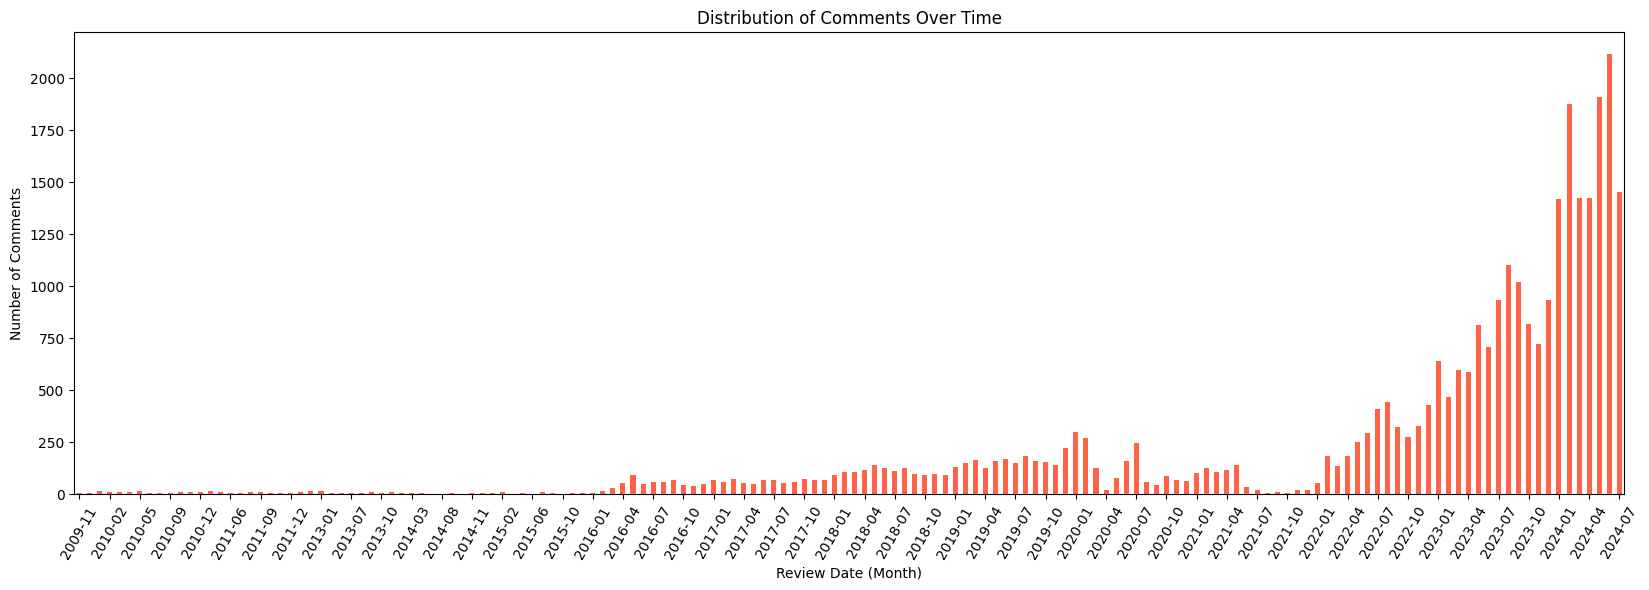

In [21]:
plt.figure(figsize=(20, 6))
comments_over_time.plot(kind='bar', color='tomato')  

# Customize the x-axis to show only 1 in 3 months
plt.xticks(range(0, len(comments_over_time), 3), comments_over_time.index[::3].strftime('%Y-%m'))

plt.title('Distribution of Comments Over Time')
plt.xlabel('Review Date (Month)')
plt.ylabel('Number of Comments')
plt.xticks(rotation=60)
plt.show()

##### Nhận xét: số lượng nhận xét tăng dần theo thời gian, có tính chu kỳ. Lượng comment giảm vào thời gian dịch covid, sau đó tăng nhanh.

##### C2. Phân phối hình thức lưu trú

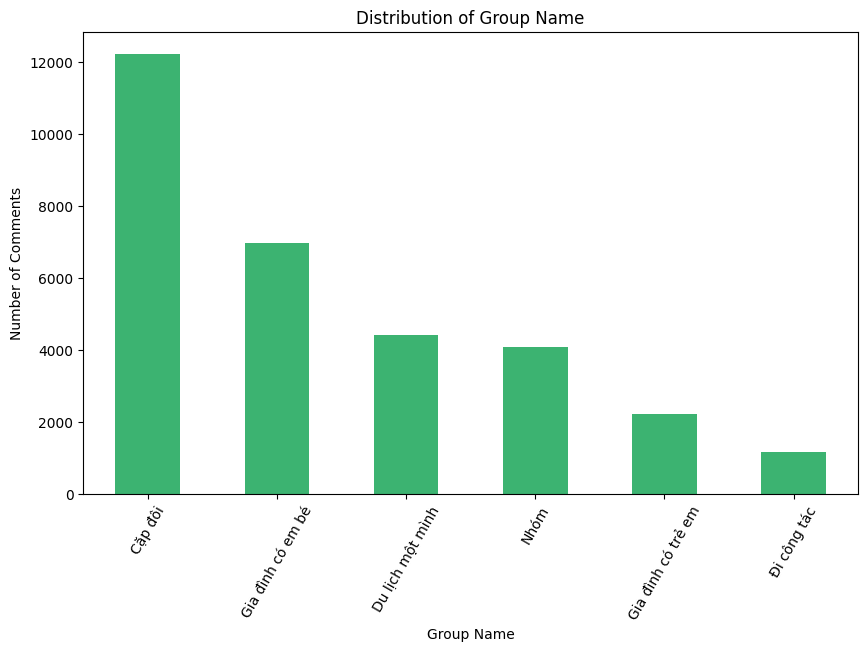

In [22]:
group_name_distribution = data_comments['Group Name'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
group_name_distribution.plot(kind='bar', color='mediumseagreen')  # Changed color to 'mediumseagreen'

plt.title('Distribution of Group Name')
plt.xlabel('Group Name')
plt.ylabel('Number of Comments')
plt.xticks(rotation=60)
plt.show()

##### C3. Xem xét quốc tịch khách

In [23]:
print(f"There are {data_comments['Nationality'].nunique()} distinct Nationalities:")
print(data_comments['Nationality'].unique())

There are 110 distinct Nationalities:
['Nhật Bản' 'Việt Nam' 'Hoa Kỳ' 'Trung Quốc' 'Bắc Macedonia' 'Hàn Quốc'
 'Campuchia' 'Thái Lan' 'Úc' 'Singapore' 'Canada' 'Ấn Độ' 'Vương quốc Anh'
 'Malaysia' 'Bangladesh' 'Nga' 'Pháp' 'Kazakhstan' 'Thụy Điển' 'Hồng Kông'
 'Thổ Nhĩ Kỳ' 'Israel' 'Đức' 'Philippines' 'Ukraine' 'Pakistan'
 'New Zealand' 'Indonesia' 'Nepal' 'Latvia' 'Tây Ban Nha' 'Monaco'
 'Ai Cập' 'Áo' 'Tanzania' 'Ireland' 'Mông Cổ' 'Ả Rập Xê Út' 'Armenia'
 'Guernsey' 'Ba Lan' 'Na Uy' 'Đan Mạch' 'Uzbekistan' 'Cộng hòa Séc'
 'Rumani' 'Đài Loan' 'Bulgaria' 'Hy Lạp' 'Turkmenistan' 'Aruba' 'Hà Lan'
 'Thụy Sĩ' 'Argentina' 'Peru' 'Nam Phi' 'Bồ Đào Nha' 'Phần Lan'
 'Antigua & Barbuda' 'Đảo Giáng Sinh' 'Belarus' 'Lào' 'Sri Lanka'
 'Nigeria' 'Mexico' 'Lithuania' 'Các Tiểu Vương Quốc Ả Rập Thống nhất'
 'Bỉ' 'Slovenia' 'Anguilla' 'Ý' 'Morocco (Ma Rốc)' 'Ma Cao' 'Brazil'
 'Myanmar' 'Azerbaijan' 'Zimbabwe' 'Ghana' 'Colombia' 'Serbia' 'Malta'
 'Quần đảo U.S. Virgin' 'Georgia' 'Qatar' 'Estonia' 'Tuni

In [24]:
import seaborn as sns

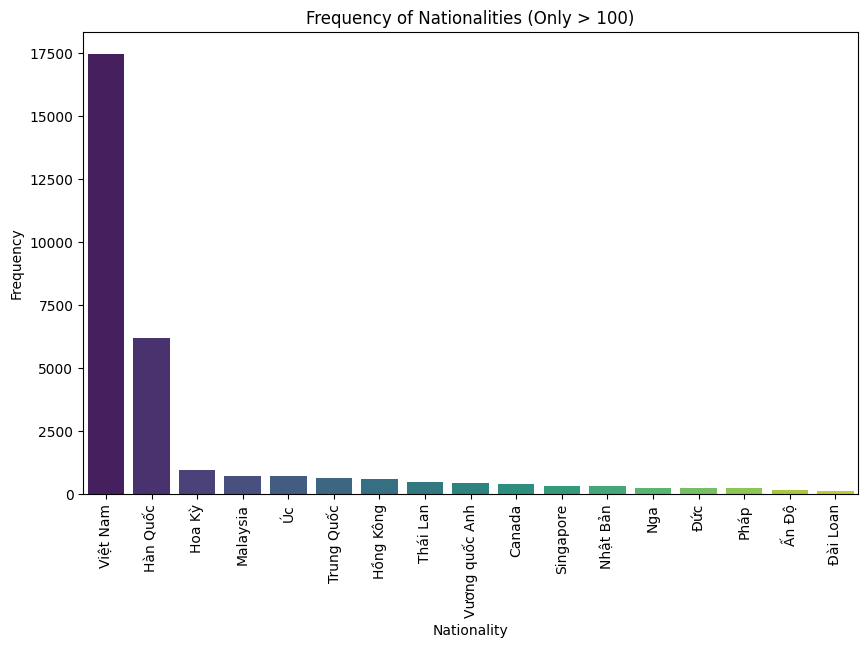

In [25]:
# Count the frequency of each nationality
nationality_counts = data_comments['Nationality'].value_counts()

# Filter to include only nationalities with frequency > 100
filtered_nationalities = nationality_counts[nationality_counts > 100]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_nationalities.index, y=filtered_nationalities.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels if necessary
plt.title('Frequency of Nationalities (Only > 100)')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.show()

##### Nhận xét: 110 quốc tịch, nhưng chủ yếu nhận xét đến từ người quốc tịch VN và Hàn Quốc. Nhiều người Mỹ là người gốc Việt, cũng nhận xét bằng tiếng Việt.

##### C4. Xem xét loại phòng

In [26]:
print(f"\nThere are {data_comments['Room Type'].nunique()} distinct Room Types")


There are 1331 distinct Room Types


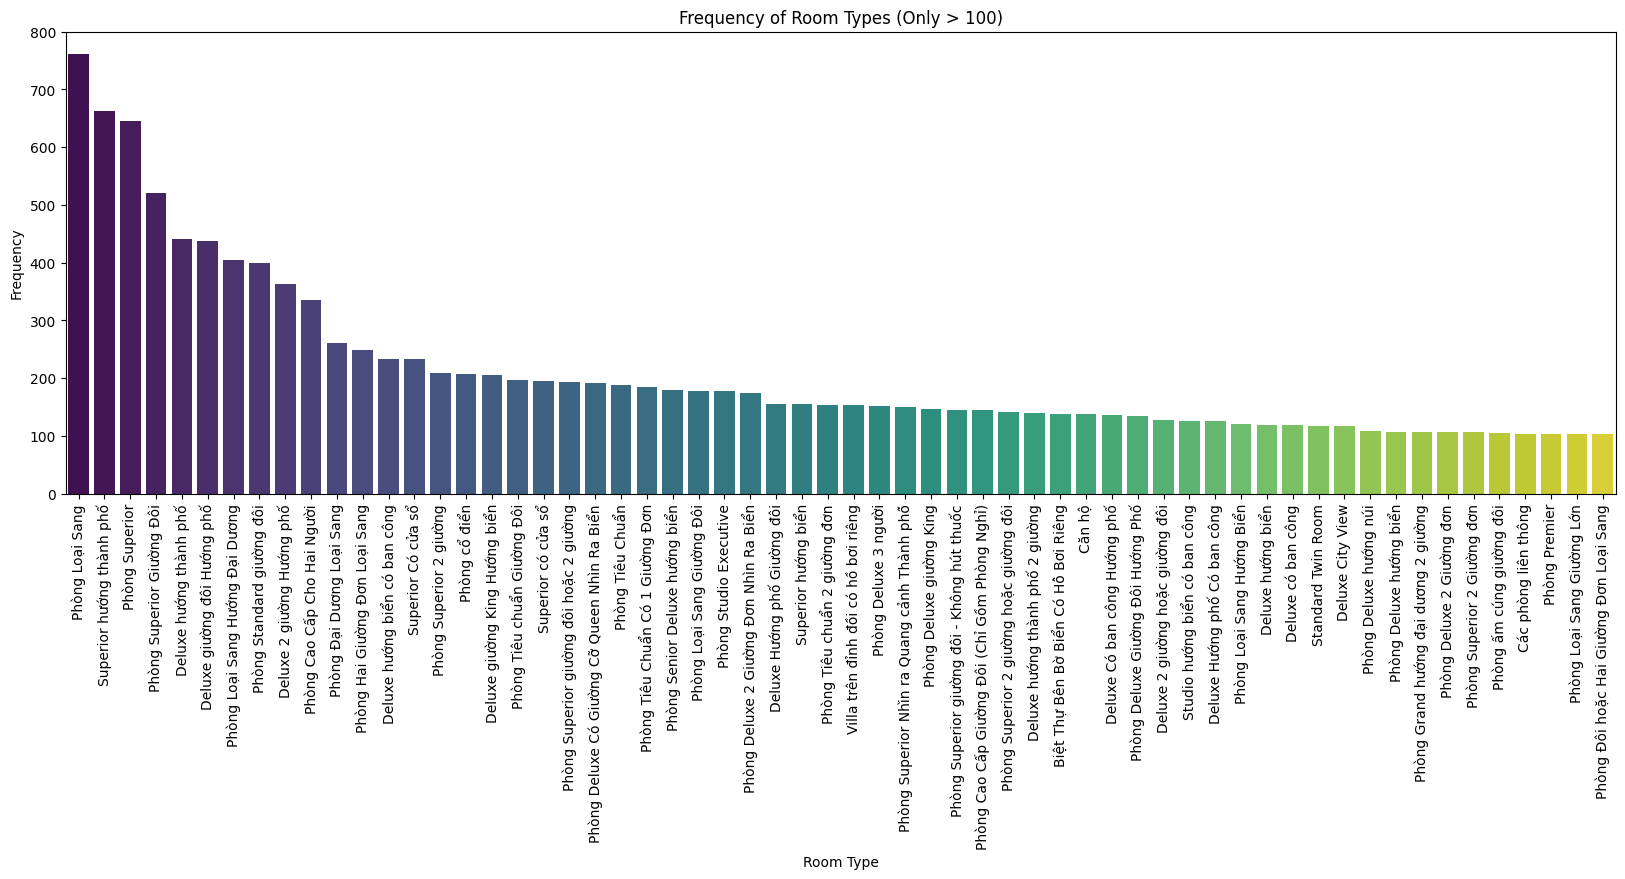

In [27]:
# Count the frequency of each nationality
roomtype_counts = data_comments['Room Type'].value_counts()

# Filter to include only nationalities with frequency > 100
filtered_roomtype = roomtype_counts[roomtype_counts > 100]

# Plot the bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x=filtered_roomtype.index, y=filtered_roomtype.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels if necessary
plt.title('Frequency of Room Types (Only > 100)')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.show()

##### C5. Xem xét Score

In [28]:
data_comments['Score'].describe()

count    31078.000000
mean         9.234513
std          0.988693
min          6.300000
25%          8.800000
50%          9.600000
75%         10.000000
max         10.000000
Name: Score, dtype: float64

c:\Users\hieni\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


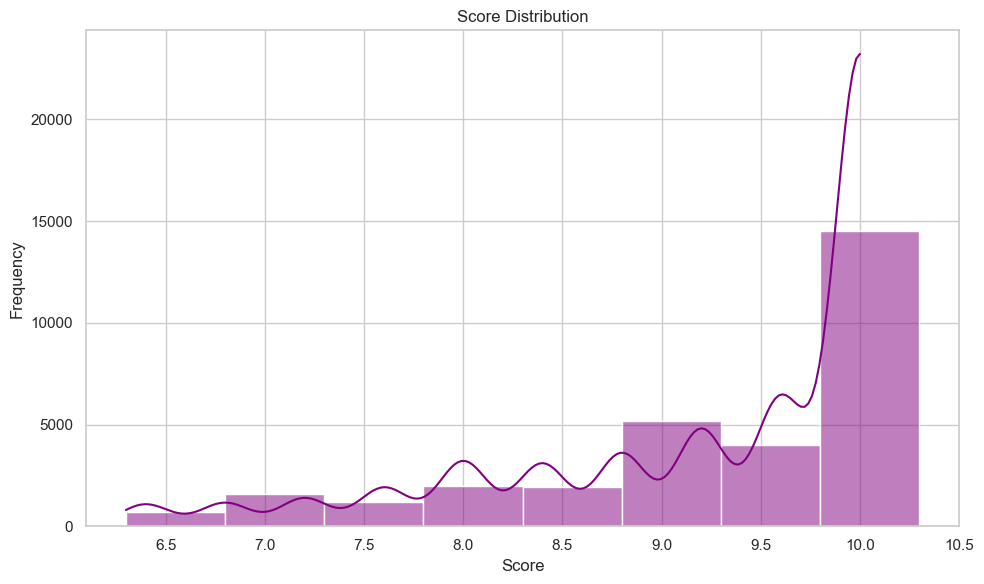

In [29]:
# Setting up the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure with specified dimensions
plt.figure(figsize=(10, 6))

# Histogram with a kernel density estimate
sns.histplot(data_comments['Score'], kde=True, color="purple", binwidth=0.5)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Thang điểm từ 6.3 đến 10, điểm trung bình rất cao (9.23), Std khá bé (0.99), chứng tỏ điểm dao động không nhiều quanh trung bình. 
##### 25% số điểm là dưới 8.8. Phần lớn điểm là từ 9.0 đến 10.

### 3. Data Preparation
#### 3.A. Lọc và xử lý dữ liệu tiếng Việt

#### Ghép Title và Body vào thành 1 cột, bỏ hết dấu câu

In [30]:
import string

# Define punctuation characters to remove
punctuation_to_remove = string.punctuation + '?' + '!' + '‼︎'

# Remove quotation marks from the 'Title' column
data_comments['Title'] = data_comments['Title'].str.replace('”', '').replace(f'[{punctuation_to_remove}]', '', regex=True)

# Remove all specified punctuation from the 'Body' column
data_comments['Body'] = data_comments['Body'].str.replace(f'[{punctuation_to_remove}]', '', regex=True)

# Combine 'Title' and 'Body' into a new column 'Review Text'
data_comments['Review Text'] = data_comments['Title'] + ' ' + data_comments['Body']

data_comments

,Hotel ID,Reviewer Name,Nationality,Group Name,Room Type,Stay Details,Score,Score Level,Title,Body,Review Date,Review Text
0,1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 3 đêm vào Tháng 7 năm 2023,10.0,3,Cao nhất,Tôi đã ở cùng chủ nhân trong 4 đêm Nhân viên r...,2023-07-30,Cao nhất Tôi đã ở cùng chủ nhân trong 4 đêm Nh...
1,1_1,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 1 đêm vào Tháng 9 năm 2022,10.0,3,Tháng 8,Lựa chọn Mường Thanh vì giá cả phù hợp Đặt Onl...,2022-09-05,Tháng 8 Lựa chọn Mường Thanh vì giá cả phù hợp...
2,1_1,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Du lịch tại Nha Trang,Lần này đến với Nha Trang tôi book phòng tại k...,2024-06-25,Du lịch tại Nha Trang Lần này đến với Nha Tran...
3,1_1,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,Đã ở 3 đêm vào Tháng 6 năm 2024,8.8,2,Du lịch Nha Trang tại Mường Thanh,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,2024-07-02,Du lịch Nha Trang tại Mường Thanh Hôm đi đến l...
4,1_1,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Ks tốt,Khách sạn có vị trí trung tâm và sát biển Nhân...,2024-06-16,Ks tốt Khách sạn có vị trí trung tâm và sát b...
...,...,...,...,...,...,...,...,...,...,...,...,...
80309,43_29,Hung,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 2 đêm vào Tháng 6 năm 2023,8.8,2,Tuyệt vời,Rất hợp lý OK lắm,2024-04-15,Tuyệt vời Rất hợp lý OK lắm
80310,43_29,Hữu,Việt Nam,Gia đình có trẻ em,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 6 năm 2024,9.6,3,Trên cả tuyệt vời,Không,2024-07-16,Trên cả tuyệt vời Không
80311,43_29,Thuy,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 6 năm 2024,8.4,2,Suitable for the price,I stayed here one night I asked for a room wit...,2024-07-03,Suitable for the price I stayed here one night...
80312,43_29,nguyen,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 4 đêm vào Tháng 12 năm 2022,7.6,1,Good price,Mini hotel that lay on the main National Route...,2023-01-05,Good price Mini hotel that lay on the main Nat...


In [31]:
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string

In [32]:
##LOAD EMOJICON
file = open('files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
#LOAD TEENCODE
file = open('files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [33]:
def simple_sent_tokenize(text):
    # Splits text into sentences based on periods followed by spaces
    # It ensures that each sentence is stripped of leading and trailing spaces and ends with a period.
    return [sentence.strip() + '.' for sentence in text.split('. ') if sentence]

In [34]:
def process_text_simple(text, emoji_dict, teen_dict, wrong_lst):
    if pd.isna(text):
        return ""  # Return an empty string for NaN values
    document = text.lower()
    document = document.replace("’", '')
    document = regex.sub(r'\.+', ".", document)
    new_sentence = ''
    for sentence in simple_sent_tokenize(document):
        # Convert Emoji
        sentence = ''.join(emoji_dict.get(word, word) + ' ' if word in emoji_dict else word for word in list(sentence))
        # Convert Teencode
        sentence = ' '.join(teen_dict.get(word, word) for word in sentence.split())
        # Delete Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern, sentence))
        # Delete Wrong Words
        sentence = ' '.join(word for word in sentence.split() if word not in wrong_lst)
        new_sentence += sentence + ' '
    document = new_sentence.strip()
    # Remove Excess Blank Space
    document = regex.sub(r'\s+', ' ', document)
    return document

In [35]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [36]:
def process_special_word(text):
    # List of negative words to check
    negative_words = ['không', 'chẳng', 'chả', 'hổng']
    new_text = ''
    text_lst = text.split()
    i = 0
    while i < len(text_lst):
        word = text_lst[i]
        # Check if the word is a negative word and not the last word in the list
        if word in negative_words and i < len(text_lst) - 1:
            # Append the current word and the next word with an underscore
            new_text += word + '_' + text_lst[i + 1] + ' '
            # Skip the next word as it has been concatenated
            i += 2
        else:
            # Append the current word
            new_text += word + ' '
            i += 1
    return new_text.strip()

In [37]:
import re
# Hàm để chuẩn hóa các từ có ký tự lặp
def normalize_repeated_characters(text):
    # Thay thế mọi ký tự lặp liên tiếp bằng một ký tự đó
    # Ví dụ: "ngonnnn" thành "ngon", "thiệtttt" thành "thiệt"
    return re.sub(r'(.)\1+', r'\1', text)

# Áp dụng hàm chuẩn hóa cho văn bản
# print(normalize_repeated_characters(example))

In [38]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['N','Np','A','AB','V','VB','VY','R']
        # lst_word_type = ['A','AB','V','VB','VY','R']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [39]:
def remove_stopword(text, stopwords):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

##### Lọc các review tiếng Việt từ data_comments

In [40]:
from langdetect import detect

# Function to detect language
def is_vietnamese(text):
    try:
        return detect(text) == 'vi'
    except:
        return False

# Apply the function to filter rows where the review 'Body' is in Vietnamese
vietnamese_reviews = data_comments[data_comments['Review Text'].apply(is_vietnamese)]

print(f"Number of reviews in Vietnamese: {len(vietnamese_reviews)}")

Number of reviews in Vietnamese: 15148


In [41]:
# Apply the process_text function to the 'Comment' column
vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Review Text'].apply(lambda x: process_text_simple(x, emoji_dict, teen_dict, wrong_lst))

C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\2142956131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Review Text'].apply(lambda x: process_text_simple(x, emoji_dict, teen_dict, wrong_lst))


In [42]:
vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Processed Review Text'].apply(lambda x: covert_unicode(x))
vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Processed Review Text'].apply(lambda x: process_special_word(x))
vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Processed Review Text'].apply(lambda x: normalize_repeated_characters(x))
vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Processed Review Text'].apply(lambda x: process_postag_thesea(x))

C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\2311726360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Processed Review Text'].apply(lambda x: covert_unicode(x))
C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\2311726360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Processed Review Text'].apply(lambda x: process_special_word(x))
C:\Users\hieni\AppData\Local\T

In [43]:
vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Processed Review Text'].apply(lambda x: remove_stopword(x, stopwords_lst))

C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\4207263714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Processed Review Text'].apply(lambda x: remove_stopword(x, stopwords_lst))


In [44]:
vietnamese_reviews

,Hotel ID,Reviewer Name,Nationality,Group Name,Room Type,Stay Details,Score,Score Level,Title,Body,Review Date,Review Text,Processed Review Text
0,1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 3 đêm vào Tháng 7 năm 2023,10.0,3,Cao nhất,Tôi đã ở cùng chủ nhân trong 4 đêm Nhân viên r...,2023-07-30,Cao nhất Tôi đã ở cùng chủ nhân trong 4 đêm Nh...,chủ_nhân đêm thân_thiện tầm biển rộng_lớn cảm_...
1,1_1,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 1 đêm vào Tháng 9 năm 2022,10.0,3,Tháng 8,Lựa chọn Mường Thanh vì giá cả phù hợp Đặt Onl...,2022-09-05,Tháng 8 Lựa chọn Mường Thanh vì giá cả phù hợp...,mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng_ch...
2,1_1,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Du lịch tại Nha Trang,Lần này đến với Nha Trang tôi book phòng tại k...,2024-06-25,Du lịch tại Nha Trang Lần này đến với Nha Tran...,lịch mường đường trần_phú cảnh thư_giãn dễ_chị...
3,1_1,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,Đã ở 3 đêm vào Tháng 6 năm 2024,8.8,2,Du lịch Nha Trang tại Mường Thanh,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,2024-07-02,Du lịch Nha Trang tại Mường Thanh Hôm đi đến l...,lịch mường_hôm điều_tuyết vời đón tiép nhiệt_t...
4,1_1,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Ks tốt,Khách sạn có vị trí trung tâm và sát biển Nhân...,2024-06-16,Ks tốt Khách sạn có vị trí trung tâm và sát b...,tốt vị_trí_tâm sát biển vẻ thân_thiện tiếp_tân...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80306,43_29,CHAU,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 2 năm 2024,7.6,1,Bình thường,Phòng hơi chật chội và phòng tắm nhỏ có mùi hô...,2024-02-11,Bình thường Phòng hơi chật chội và phòng tắm ...,bình_thường hơi chật_chội tắm mùi hôi_tạo cảm_...
80307,43_29,Quý,Việt Nam,Gia đình có em bé,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 11 năm 2023,9.6,3,Khách sạn ổn trong khu vực,Mọi thứ đều ổn,2023-11-06,Khách sạn ổn trong khu vực Mọi thứ đều ổn,ổn vực ổn
80308,43_29,Sang,Việt Nam,Du lịch một mình,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 2 năm 2023,7.6,1,Rất tốt,Mọi thứ khá ổn trừ nhân viên chưa chuyên nghiệ...,2023-02-16,Rất tốt Mọi thứ khá ổn trừ nhân viên chưa chuy...,tốt ổn_trừ chuyên_nghiệp thân_thiện lắm
80309,43_29,Hung,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 2 đêm vào Tháng 6 năm 2023,8.8,2,Tuyệt vời,Rất hợp lý OK lắm,2024-04-15,Tuyệt vời Rất hợp lý OK lắm,tuyệt_vời hợp_lý lắm


#### Xem thử frequency của từ ở từng Score Level

In [45]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist

# Assuming 'vietnamese_reviews' is your DataFrame
# Filter non-string entries in 'Processed Body'
vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Processed Review Text'].apply(lambda x: x if isinstance(x, str) else '')

# Function to get the most common words for a given score level
def analyze_score_level(score_level):
    # Filter the DataFrame for the given score level
    filtered_df = vietnamese_reviews[vietnamese_reviews['Score Level'] == score_level]
    
    # Combine all comments into a single string
    body_string = ' '.join(filtered_df['Processed Review Text'])
    
    # Tokenize the combined string
    body_tokens = word_tokenize(body_string)
    
    # Calculate frequency distribution
    fq = FreqDist(body_tokens)
    
    # Get the most common 100 tokens
    return fq.most_common(300)

# List of score levels to analyze
score_levels = [3, 2, 1, 0]

# Dictionary to store frequency distributions for each score level
freq_distributions = {score_level: analyze_score_level(score_level) for score_level in score_levels}

# Display the results
for score_level, freq_dist in freq_distributions.items():
    print(f"Score Level {score_level} - Most Common Words:")
    words = [f"{word}: {freq}" for word, freq in freq_dist]
    print(", ".join(words))
    print()

C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\2719247009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews['Processed Review Text'] = vietnamese_reviews['Processed Review Text'].apply(lambda x: x if isinstance(x, str) else '')


Score Level 3 - Most Common Words:
tuyệt_vời: 5591, tốt: 3211, đẹp: 2945, sạch_sẽ: 2934, biển: 2817, thân_thiện: 1599, giá: 1544, nhiệt_tình: 1543, cảnh: 1207, tiện: 1115, dịch_vụ: 1014, hơi: 941, bơi: 927, hài_lòng: 787, tiền: 762, bãi: 761, khách: 702, đình: 666, sạch: 665, chỗ: 602, hồ: 593, ổn: 558, món: 555, đầy_đủ: 553, thích: 546, phục_vụ: 535, đồ_ăn: 511, nghỉ: 502, trải_nghiệm: 491, dễ_thương: 490, thuận_tiện: 466, đêm: 460, rẻ: 457, tâm: 446, rộng: 441, chất_lượng: 438, tắm: 425, giá_cả: 413, bữa: 412, thoải_mái: 406, rộng_rãi: 402, dịp: 400, nằm: 382, hợp_lý: 368, lắm: 367, lịch: 362, phòng_ốc: 362, trẻ: 333, nghỉ_dưỡng: 331, tầng: 326, máy: 324, đường: 322, địa_điểm: 320, tầm: 305, nhà_hàng: 298, thành_phố: 286, bể: 283, chuyến: 264, đi_lại: 257, lựa_chọn: 255, ghé: 253, ăn_uống: 234, yên_tĩnh: 229, lưu_trú: 227, giường: 218, vẻ: 216, kỳ_nghỉ: 216, tuyệt: 213, trừ: 208, quán: 198, đáo: 195, di_chuyển: 193, căn_hộ: 193, tiện_lợi: 189, thoáng: 185, đậu: 184, bé: 179, trở_lại:

##### Từ list frequency này bổ sung vào danh sách positive và negative words

In [46]:
positive_words = [
    "thích", "tốt", "xuất_sắc", "tuyệt_vời", "tuyệt_hảo", "đẹp", "ổn", "ngon",
    "hài_lòng", "ưng_ý", "hoàn_hảo", "chất_lượng", "thú_vị", "nhanh", "tiện",
    "tiện_lợi", "dễ_sử_dụng", "hiệu_quả", "ấn_tượng", "nhiệt_tình",
    "nổi_bật", "tận_hưởng", "tốn_ít_thời_gian", "thân_thiện", "hấp_dẫn",
    "cao_cấp", "độc_đáo", "rất_tốt", "rất_thích", "tận_tâm", "đáng_tin_cậy", "đẳng_cấp",
    "hấp_dẫn", "an_tâm", "thúc_đẩy", "cảm_động", "phục_vụ_tốt", "làm_hài_lòng", "gây_ấn_tượng", "nổi_trội",
    "sáng_tạo", "phù_hợp", "tận_tâm", "hiếm_có", "cải_thiện", "hoà_nhã", "chăm_chỉ", "cẩn_thận",
    "vui_vẻ", "sáng_sủa", "hào_hứng", "đam_mê", "vừa_vặn", "đáng_tiền", "rẻ",
    "sạch_sẽ", "tuyệt", "sạch", "đồng_ý", "yêu", "thoải mái", "hữu_ích", "rộng_rãi", "đầy_đủ", "dễ_thương",
    "hợp_lý", "thuận_tiện", "yên_tĩnh", "miễn_phí", "thư_giãn", "tốt_bụng", "đáng_giá", "chuyên_nghiệp", "xịn",
    "đa_dạng", "hàng_đầu", "sang_trọng", "tuyệt_diệu", "lịch_sự", "cảm_tạ", "niềm_nở", "thơm", "thoáng", "mát", "tuyệt_quá",
    "sạch_đẹp", "xứng_đáng", "dễ_chịu", "thượng_hạng", "hiếu_khách"
]
len(positive_words)

90

In [47]:
negative_words = [
    "kém", "tệ", "buồn", "chán",
    "kém_chất_lượng", "không_thích", "không_ổn",
    "không_hợp", "không_đáng_tin_cậy", "không_chuyên_nghiệp",
    "không_phản_hồi", "không_an_toàn", "không_phù_hợp", "không_thân_thiện", "không_linh_hoạt", "không_đáng_giá",
    "không_ấn_tượng", "không_tốt", "chậm", "khó_khăn", "phức_tạp",
    "khó_chịu", "gây_khó_dễ", "rườm_rà", "thất_bại", "tồi_tệ", "khó_xử", "không_thể_chấp_nhận", "tồi_tệ","không_rõ_ràng",
    "không_chắc_chắn", "rối_rắm", "không_tiện_lợi", "không_đáng_tiền", "chưa_đẹp", "không_đẹp",
    'tồi', 'xấu', 'không_hài_lòng', 'bẩn', 'khó-chịu', 'không_sạch_sẽ', 'không_thoải_mái', 'không_đáng', 'quá_tệ', 'rất_tệ',
    'thất_vọng', 'chán', 'tệ_hại', 'kinh_khủng', 'khủng_khiếp', 'không_ưng_ý', 
    'ồn', "cũ", "mùi", "tạm", "thất_vọng", "dơ", "tối", "rác", "nghèo", "khó_chịu", "muỗi", 'không_hoạt_động', "chê", "nhược_điểm", "nóng_bức", 
    'bất_tiện', "nóng", "xuống_cấp", 'hư', "không nhiệt tình", 'không_xứng'
]
len(negative_words)

73

In [48]:
import re

def find_words(document, list_of_words):
    word_count = 0
    word_list = []

    for word in list_of_words:
        # Create a regex pattern for exact word matching
        pattern = rf'\b{re.escape(word)}\b'
        matches = re.findall(pattern, document.lower())
        
        if matches:
            print(word)
            word_count += len(matches)
            word_list.append(word)

    return word_count, word_list

In [49]:
vietnamese_reviews[['positive_count', 'positive_word_list']] = vietnamese_reviews['Processed Review Text'].apply(lambda x: pd.Series(find_words(x, positive_words)))
vietnamese_reviews

tuyệt_vời
thú_vị
thân_thiện
cảm_động
nhiệt_tình
đầy_đủ
tiện
sạch_sẽ
đầy_đủ
thư_giãn
niềm_nở
dễ_chịu
nhiệt_tình
đầy_đủ
tốt
đẹp
nhiệt_tình
thân_thiện
rộng_rãi
thoáng
tốt
đẹp
tiện_lợi
nhiệt_tình
dễ_thương
tuyệt_vời
ấn_tượng
nhiệt_tình
dễ_thương
chuyên_nghiệp
nhiệt_tình
rộng_rãi
tuyệt_vời
sạch_sẽ
đẹp
ưng_ý
nhiệt_tình
sạch_sẽ
tốt
ổn
nhiệt_tình
tốt
tuyệt_vời
dễ_thương
hợp_lý
nhiệt_tình
đẹp
nhiệt_tình
lịch_sự
tuyệt_vời
ổn
sạch_sẽ
tốt
đẹp
tiện
nhiệt_tình
dễ_thương
hài_lòng
hài_lòng
tiện
sạch_sẽ
đầy_đủ
đẹp
sạch_sẽ
rộng_rãi
thuận_tiện
hài_lòng
đầy_đủ
thích
tốt
hài_lòng
tiện
sạch_sẽ
xuất_sắc
đẹp
tốt
hài_lòng
ưng_ý
sạch
tốt
chất_lượng
thân_thiện
tuyệt_vời
đẹp
nhiệt_tình
sạch_sẽ
tuyệt_vời
đẹp
nhiệt_tình
đầy_đủ
thích
tốt
đẹp
nhiệt_tình
sạch_sẽ
rộng_rãi
chuyên_nghiệp
tốt
tuyệt_vời
ổn
nhiệt_tình
thích
đẹp
thân_thiện
tuyệt
hài_lòng
nhiệt_tình
hợp_lý
đẹp
nhiệt_tình
sạch_sẽ
tốt
hài_lòng
nhiệt_tình
thân_thiện
tuyệt_vời
tuyệt_vời
đẹp
nhiệt_tình
sạch
đẹp
cải_thiện
hài_lòng
đẹp
tuyệt_vời
đẹp
nhiệt_tình
sạch_

C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\412476036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews[['positive_count', 'positive_word_list']] = vietnamese_reviews['Processed Review Text'].apply(lambda x: pd.Series(find_words(x, positive_words)))
C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\412476036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews[['positive_count', 'positive_word_list']] = vietnamese_reviews['Processed Review Text'].apply(lambda x: 

,Hotel ID,Reviewer Name,Nationality,Group Name,Room Type,Stay Details,Score,Score Level,Title,Body,Review Date,Review Text,Processed Review Text,positive_count,positive_word_list
0,1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 3 đêm vào Tháng 7 năm 2023,10.0,3,Cao nhất,Tôi đã ở cùng chủ nhân trong 4 đêm Nhân viên r...,2023-07-30,Cao nhất Tôi đã ở cùng chủ nhân trong 4 đêm Nh...,chủ_nhân đêm thân_thiện tầm biển rộng_lớn cảm_...,4,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động]"
1,1_1,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 1 đêm vào Tháng 9 năm 2022,10.0,3,Tháng 8,Lựa chọn Mường Thanh vì giá cả phù hợp Đặt Onl...,2022-09-05,Tháng 8 Lựa chọn Mường Thanh vì giá cả phù hợp...,mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng_ch...,2,"[nhiệt_tình, đầy_đủ]"
2,1_1,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Du lịch tại Nha Trang,Lần này đến với Nha Trang tôi book phòng tại k...,2024-06-25,Du lịch tại Nha Trang Lần này đến với Nha Tran...,lịch mường đường trần_phú cảnh thư_giãn dễ_chị...,6,"[tiện, sạch_sẽ, đầy_đủ, thư_giãn, niềm_nở, dễ_..."
3,1_1,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,Đã ở 3 đêm vào Tháng 6 năm 2024,8.8,2,Du lịch Nha Trang tại Mường Thanh,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,2024-07-02,Du lịch Nha Trang tại Mường Thanh Hôm đi đến l...,lịch mường_hôm điều_tuyết vời đón tiép nhiệt_t...,3,"[nhiệt_tình, đầy_đủ]"
4,1_1,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Ks tốt,Khách sạn có vị trí trung tâm và sát biển Nhân...,2024-06-16,Ks tốt Khách sạn có vị trí trung tâm và sát b...,tốt vị_trí_tâm sát biển vẻ thân_thiện tiếp_tân...,6,"[tốt, đẹp, nhiệt_tình, thân_thiện, rộng_rãi, t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80306,43_29,CHAU,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 2 năm 2024,7.6,1,Bình thường,Phòng hơi chật chội và phòng tắm nhỏ có mùi hô...,2024-02-11,Bình thường Phòng hơi chật chội và phòng tắm ...,bình_thường hơi chật_chội tắm mùi hôi_tạo cảm_...,0,[]
80307,43_29,Quý,Việt Nam,Gia đình có em bé,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 11 năm 2023,9.6,3,Khách sạn ổn trong khu vực,Mọi thứ đều ổn,2023-11-06,Khách sạn ổn trong khu vực Mọi thứ đều ổn,ổn vực ổn,2,[ổn]
80308,43_29,Sang,Việt Nam,Du lịch một mình,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 2 năm 2023,7.6,1,Rất tốt,Mọi thứ khá ổn trừ nhân viên chưa chuyên nghiệ...,2023-02-16,Rất tốt Mọi thứ khá ổn trừ nhân viên chưa chuy...,tốt ổn_trừ chuyên_nghiệp thân_thiện lắm,3,"[tốt, thân_thiện, chuyên_nghiệp]"
80309,43_29,Hung,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 2 đêm vào Tháng 6 năm 2023,8.8,2,Tuyệt vời,Rất hợp lý OK lắm,2024-04-15,Tuyệt vời Rất hợp lý OK lắm,tuyệt_vời hợp_lý lắm,2,"[tuyệt_vời, hợp_lý]"


In [50]:
vietnamese_reviews[['negative_count', 'negative_word_list']] = vietnamese_reviews['Processed Review Text'].apply(lambda x: pd.Series(find_words(x, negative_words)))
vietnamese_reviews

không_thích
nóng
chậm
tệ
chậm
cũ
buồn
chậm
rườm_rà
tạm
chê
nóng
tối
không_xứng
tối
tệ
tạm
nóng
cũ
thất_vọng
thất_vọng
nóng
hư
bất_tiện
chậm
bẩn
nóng
nóng
chậm
cũ
không_hài_lòng
tạm
nóng_bức
nóng
tệ
thất_vọng
thất_vọng
chê
chậm
bất_tiện
kém
chậm
tạm
xuống_cấp
không_hài_lòng
kém
chậm
cũ
tối
chậm
cũ
nóng
tệ
tối
mùi
bẩn
tạm
khó_chịu
khó_chịu
nóng
không_thân_thiện
không_tốt
tạm
cũ
tệ
hư
mùi
mùi
kém
mùi
cũ
hư
tạm
xuống_cấp
kém
bẩn
bẩn
mùi
tạm
tạm
dơ
không_hoạt_động
bất_tiện
cũ
tạm
hư
tạm
cũ
mùi
tạm
cũ
nóng
mùi
cũ
bất_tiện
nóng
ồn
muỗi
kém
khó_chịu
thất_vọng
thất_vọng
khó_chịu
không_tốt
tối
không_thân_thiện
khó_chịu
cũ
tối
khó_chịu
bất_tiện
cũ
tạm
ồn
tạm
ồn
tạm
chê
thất_vọng
thất_vọng
mùi
khó_chịu
tạm
khó_chịu
tạm
ồn
tối
nhược_điểm
mùi
bất_tiện
kém
tệ
tối
ồn
thất_vọng
thất_vọng
không_tốt
chê
chậm
nóng
không_chuyên_nghiệp
khó_chịu
mùi
khó_chịu
tệ
tối
tệ
cũ
tạm
tệ
cũ
mùi
tạm
bẩn
tối
không_hoạt_động
tạm
bất_tiện
nóng
tạm
bất_tiện
bất_tiện
kém
chậm
nhược_điểm
bất_tiện
không_thân_thiện
mùi
nóng
bẩ

C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\2063281998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews[['negative_count', 'negative_word_list']] = vietnamese_reviews['Processed Review Text'].apply(lambda x: pd.Series(find_words(x, negative_words)))
C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\2063281998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews[['negative_count', 'negative_word_list']] = vietnamese_reviews['Processed Review Text'].apply(lambda x

,Hotel ID,Reviewer Name,Nationality,Group Name,Room Type,Stay Details,Score,Score Level,Title,Body,Review Date,Review Text,Processed Review Text,positive_count,positive_word_list,negative_count,negative_word_list
0,1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 3 đêm vào Tháng 7 năm 2023,10.0,3,Cao nhất,Tôi đã ở cùng chủ nhân trong 4 đêm Nhân viên r...,2023-07-30,Cao nhất Tôi đã ở cùng chủ nhân trong 4 đêm Nh...,chủ_nhân đêm thân_thiện tầm biển rộng_lớn cảm_...,4,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động]",0,[]
1,1_1,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 1 đêm vào Tháng 9 năm 2022,10.0,3,Tháng 8,Lựa chọn Mường Thanh vì giá cả phù hợp Đặt Onl...,2022-09-05,Tháng 8 Lựa chọn Mường Thanh vì giá cả phù hợp...,mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng_ch...,2,"[nhiệt_tình, đầy_đủ]",0,[]
2,1_1,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Du lịch tại Nha Trang,Lần này đến với Nha Trang tôi book phòng tại k...,2024-06-25,Du lịch tại Nha Trang Lần này đến với Nha Tran...,lịch mường đường trần_phú cảnh thư_giãn dễ_chị...,6,"[tiện, sạch_sẽ, đầy_đủ, thư_giãn, niềm_nở, dễ_...",0,[]
3,1_1,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,Đã ở 3 đêm vào Tháng 6 năm 2024,8.8,2,Du lịch Nha Trang tại Mường Thanh,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,2024-07-02,Du lịch Nha Trang tại Mường Thanh Hôm đi đến l...,lịch mường_hôm điều_tuyết vời đón tiép nhiệt_t...,3,"[nhiệt_tình, đầy_đủ]",0,[]
4,1_1,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Ks tốt,Khách sạn có vị trí trung tâm và sát biển Nhân...,2024-06-16,Ks tốt Khách sạn có vị trí trung tâm và sát b...,tốt vị_trí_tâm sát biển vẻ thân_thiện tiếp_tân...,6,"[tốt, đẹp, nhiệt_tình, thân_thiện, rộng_rãi, t...",2,"[không_thích, nóng]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80306,43_29,CHAU,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 2 năm 2024,7.6,1,Bình thường,Phòng hơi chật chội và phòng tắm nhỏ có mùi hô...,2024-02-11,Bình thường Phòng hơi chật chội và phòng tắm ...,bình_thường hơi chật_chội tắm mùi hôi_tạo cảm_...,0,[],1,[mùi]
80307,43_29,Quý,Việt Nam,Gia đình có em bé,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 11 năm 2023,9.6,3,Khách sạn ổn trong khu vực,Mọi thứ đều ổn,2023-11-06,Khách sạn ổn trong khu vực Mọi thứ đều ổn,ổn vực ổn,2,[ổn],0,[]
80308,43_29,Sang,Việt Nam,Du lịch một mình,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 2 năm 2023,7.6,1,Rất tốt,Mọi thứ khá ổn trừ nhân viên chưa chuyên nghiệ...,2023-02-16,Rất tốt Mọi thứ khá ổn trừ nhân viên chưa chuy...,tốt ổn_trừ chuyên_nghiệp thân_thiện lắm,3,"[tốt, thân_thiện, chuyên_nghiệp]",0,[]
80309,43_29,Hung,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 2 đêm vào Tháng 6 năm 2023,8.8,2,Tuyệt vời,Rất hợp lý OK lắm,2024-04-15,Tuyệt vời Rất hợp lý OK lắm,tuyệt_vời hợp_lý lắm,2,"[tuyệt_vời, hợp_lý]",0,[]


In [51]:
vietnamese_reviews['Pos-Neg'] = vietnamese_reviews['positive_count'] - vietnamese_reviews['negative_count']
vietnamese_reviews


C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\2284079223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews['Pos-Neg'] = vietnamese_reviews['positive_count'] - vietnamese_reviews['negative_count']


,Hotel ID,Reviewer Name,Nationality,Group Name,Room Type,Stay Details,Score,Score Level,Title,Body,Review Date,Review Text,Processed Review Text,positive_count,positive_word_list,negative_count,negative_word_list,Pos-Neg
0,1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 3 đêm vào Tháng 7 năm 2023,10.0,3,Cao nhất,Tôi đã ở cùng chủ nhân trong 4 đêm Nhân viên r...,2023-07-30,Cao nhất Tôi đã ở cùng chủ nhân trong 4 đêm Nh...,chủ_nhân đêm thân_thiện tầm biển rộng_lớn cảm_...,4,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động]",0,[],4
1,1_1,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 1 đêm vào Tháng 9 năm 2022,10.0,3,Tháng 8,Lựa chọn Mường Thanh vì giá cả phù hợp Đặt Onl...,2022-09-05,Tháng 8 Lựa chọn Mường Thanh vì giá cả phù hợp...,mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng_ch...,2,"[nhiệt_tình, đầy_đủ]",0,[],2
2,1_1,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Du lịch tại Nha Trang,Lần này đến với Nha Trang tôi book phòng tại k...,2024-06-25,Du lịch tại Nha Trang Lần này đến với Nha Tran...,lịch mường đường trần_phú cảnh thư_giãn dễ_chị...,6,"[tiện, sạch_sẽ, đầy_đủ, thư_giãn, niềm_nở, dễ_...",0,[],6
3,1_1,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,Đã ở 3 đêm vào Tháng 6 năm 2024,8.8,2,Du lịch Nha Trang tại Mường Thanh,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,2024-07-02,Du lịch Nha Trang tại Mường Thanh Hôm đi đến l...,lịch mường_hôm điều_tuyết vời đón tiép nhiệt_t...,3,"[nhiệt_tình, đầy_đủ]",0,[],3
4,1_1,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Ks tốt,Khách sạn có vị trí trung tâm và sát biển Nhân...,2024-06-16,Ks tốt Khách sạn có vị trí trung tâm và sát b...,tốt vị_trí_tâm sát biển vẻ thân_thiện tiếp_tân...,6,"[tốt, đẹp, nhiệt_tình, thân_thiện, rộng_rãi, t...",2,"[không_thích, nóng]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80306,43_29,CHAU,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 2 năm 2024,7.6,1,Bình thường,Phòng hơi chật chội và phòng tắm nhỏ có mùi hô...,2024-02-11,Bình thường Phòng hơi chật chội và phòng tắm ...,bình_thường hơi chật_chội tắm mùi hôi_tạo cảm_...,0,[],1,[mùi],-1
80307,43_29,Quý,Việt Nam,Gia đình có em bé,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 11 năm 2023,9.6,3,Khách sạn ổn trong khu vực,Mọi thứ đều ổn,2023-11-06,Khách sạn ổn trong khu vực Mọi thứ đều ổn,ổn vực ổn,2,[ổn],0,[],2
80308,43_29,Sang,Việt Nam,Du lịch một mình,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 2 năm 2023,7.6,1,Rất tốt,Mọi thứ khá ổn trừ nhân viên chưa chuyên nghiệ...,2023-02-16,Rất tốt Mọi thứ khá ổn trừ nhân viên chưa chuy...,tốt ổn_trừ chuyên_nghiệp thân_thiện lắm,3,"[tốt, thân_thiện, chuyên_nghiệp]",0,[],3
80309,43_29,Hung,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 2 đêm vào Tháng 6 năm 2023,8.8,2,Tuyệt vời,Rất hợp lý OK lắm,2024-04-15,Tuyệt vời Rất hợp lý OK lắm,tuyệt_vời hợp_lý lắm,2,"[tuyệt_vời, hợp_lý]",0,[],2


### 3.B. Đề ra tập luật phân loại 

In [52]:
def labeling(row):
    if row['Score'] >= 9.0 and row['Pos-Neg'] >= 0:
        return 'POSITIVE'
    elif row['Score'] >= 9.0 and row['Pos-Neg'] < 0:
        return 'NEUTRAL'
    elif row['Score'] < 9.0 and row['Pos-Neg'] >= 0:
        return 'NEUTRAL'
    elif row['Score'] < 9.0 and row['Pos-Neg'] < 0:
        return 'NEGATIVE'

In [53]:
# Create a new column LABEL
vietnamese_reviews['Label'] = vietnamese_reviews.apply(labeling, axis=1)
vietnamese_reviews

C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\2252469337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnamese_reviews['Label'] = vietnamese_reviews.apply(labeling, axis=1)


,Hotel ID,Reviewer Name,Nationality,Group Name,Room Type,Stay Details,Score,Score Level,Title,Body,Review Date,Review Text,Processed Review Text,positive_count,positive_word_list,negative_count,negative_word_list,Pos-Neg,Label
0,1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 3 đêm vào Tháng 7 năm 2023,10.0,3,Cao nhất,Tôi đã ở cùng chủ nhân trong 4 đêm Nhân viên r...,2023-07-30,Cao nhất Tôi đã ở cùng chủ nhân trong 4 đêm Nh...,chủ_nhân đêm thân_thiện tầm biển rộng_lớn cảm_...,4,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động]",0,[],4,POSITIVE
1,1_1,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 1 đêm vào Tháng 9 năm 2022,10.0,3,Tháng 8,Lựa chọn Mường Thanh vì giá cả phù hợp Đặt Onl...,2022-09-05,Tháng 8 Lựa chọn Mường Thanh vì giá cả phù hợp...,mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng_ch...,2,"[nhiệt_tình, đầy_đủ]",0,[],2,POSITIVE
2,1_1,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Du lịch tại Nha Trang,Lần này đến với Nha Trang tôi book phòng tại k...,2024-06-25,Du lịch tại Nha Trang Lần này đến với Nha Tran...,lịch mường đường trần_phú cảnh thư_giãn dễ_chị...,6,"[tiện, sạch_sẽ, đầy_đủ, thư_giãn, niềm_nở, dễ_...",0,[],6,POSITIVE
3,1_1,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,Đã ở 3 đêm vào Tháng 6 năm 2024,8.8,2,Du lịch Nha Trang tại Mường Thanh,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,2024-07-02,Du lịch Nha Trang tại Mường Thanh Hôm đi đến l...,lịch mường_hôm điều_tuyết vời đón tiép nhiệt_t...,3,"[nhiệt_tình, đầy_đủ]",0,[],3,NEUTRAL
4,1_1,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,Đã ở 1 đêm vào Tháng 6 năm 2024,9.2,3,Ks tốt,Khách sạn có vị trí trung tâm và sát biển Nhân...,2024-06-16,Ks tốt Khách sạn có vị trí trung tâm và sát b...,tốt vị_trí_tâm sát biển vẻ thân_thiện tiếp_tân...,6,"[tốt, đẹp, nhiệt_tình, thân_thiện, rộng_rãi, t...",2,"[không_thích, nóng]",4,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80306,43_29,CHAU,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 2 năm 2024,7.6,1,Bình thường,Phòng hơi chật chội và phòng tắm nhỏ có mùi hô...,2024-02-11,Bình thường Phòng hơi chật chội và phòng tắm ...,bình_thường hơi chật_chội tắm mùi hôi_tạo cảm_...,0,[],1,[mùi],-1,NEGATIVE
80307,43_29,Quý,Việt Nam,Gia đình có em bé,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 11 năm 2023,9.6,3,Khách sạn ổn trong khu vực,Mọi thứ đều ổn,2023-11-06,Khách sạn ổn trong khu vực Mọi thứ đều ổn,ổn vực ổn,2,[ổn],0,[],2,POSITIVE
80308,43_29,Sang,Việt Nam,Du lịch một mình,Phòng Giường Đôi Có Ban Công,Đã ở 1 đêm vào Tháng 2 năm 2023,7.6,1,Rất tốt,Mọi thứ khá ổn trừ nhân viên chưa chuyên nghiệ...,2023-02-16,Rất tốt Mọi thứ khá ổn trừ nhân viên chưa chuy...,tốt ổn_trừ chuyên_nghiệp thân_thiện lắm,3,"[tốt, thân_thiện, chuyên_nghiệp]",0,[],3,NEUTRAL
80309,43_29,Hung,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,Đã ở 2 đêm vào Tháng 6 năm 2023,8.8,2,Tuyệt vời,Rất hợp lý OK lắm,2024-04-15,Tuyệt vời Rất hợp lý OK lắm,tuyệt_vời hợp_lý lắm,2,"[tuyệt_vời, hợp_lý]",0,[],2,NEUTRAL


#### Đếm thử số label

In [54]:
count = vietnamese_reviews['Label'].value_counts()
count

Label
POSITIVE    10848
NEUTRAL      3881
NEGATIVE      419
Name: count, dtype: int64

##### Nhận xét: Dữ liệu khá imbalanced. Rất nhiều review positive.

#### 3. C. Xử lý, ghép 2 dataset lại và lưu dữ liệu

In [55]:
# Drop các cột Stay Details, Title và Body cho gọn
vietnamese_reviews = vietnamese_reviews.drop(columns=['Stay Details', 'Title', 'Body'])

In [56]:
# Join dữ liệu Review và thông tin của khách sạn lại với nhau
df = pd.merge(vietnamese_reviews, data_profiles, on='Hotel ID', how='left')
df.head(10)

,Hotel ID,Reviewer Name,Nationality,Group Name,Room Type,Score,Score Level,Review Date,Review Text,Processed Review Text,...,Hotel Name,Hotel Rank,Hotel Address,Total Score,Vị trí,Độ sạch sẽ,Dịch vụ,Tiện nghi,Đáng giá tiền,Sự thoải mái và chất lượng phòng
0,1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,3,2023-07-30,Cao nhất Tôi đã ở cùng chủ nhân trong 4 đêm Nh...,chủ_nhân đêm thân_thiện tầm biển rộng_lớn cảm_...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
1,1_1,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,3,2022-09-05,Tháng 8 Lựa chọn Mường Thanh vì giá cả phù hợp...,mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng_ch...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
2,1_1,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,3,2024-06-25,Du lịch tại Nha Trang Lần này đến với Nha Tran...,lịch mường đường trần_phú cảnh thư_giãn dễ_chị...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
3,1_1,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,2,2024-07-02,Du lịch Nha Trang tại Mường Thanh Hôm đi đến l...,lịch mường_hôm điều_tuyết vời đón tiép nhiệt_t...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
4,1_1,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,3,2024-06-16,Ks tốt Khách sạn có vị trí trung tâm và sát b...,tốt vị_trí_tâm sát biển vẻ thân_thiện tiếp_tân...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
5,1_1,Thuy,Việt Nam,Gia đình có trẻ em,Deluxe Hướng biển giường đôi,10.0,3,2024-06-28,Khách sạn tốt Khách sạn đẹp rộng Phòng hướng ...,tốt đẹp rộng hướng biển rộng cảnh đẹp nằm bờ b...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
6,1_1,Vui,Việt Nam,Gia đình có trẻ em,Phòng Gia Đình Loại Sang,10.0,3,2024-02-26,Tôi Rất ấn tượng với hotel Mường Thanh và tất ...,ấn_tượng mường mường trải_nghiệm thức_ăn nhà_h...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
7,1_1,Trang,Việt Nam,Gia đình có em bé,Phòng Gia Đình Loại Sang,9.6,3,2024-07-07,Đánh giá Khách sạn ở vị trí trung tâm nhân viê...,tâm_nhân_viên phục_vụ nhiệt_tình rộng_rãi trừ ...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
8,1_1,Thuy,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,8.8,2,2024-03-20,Tuyệt vời KS khá sạch sẽ vị trí quá tuyệt vời ...,tuyệt_vời sạch_sẽ tuyệt_vời tâm_điểm đồ_vật mi...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
9,1_1,Thảo,Việt Nam,Du lịch một mình,Deluxe giường đôi Hướng phố,10.0,3,2024-02-07,Mường Thanh Nha Trang rất đáng để nghỉ dưỡng d...,mường nghỉ_dưỡng mường phòng_tiện nội_thất_đẹp...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3


In [57]:
# Save the DataFrame to a CSV file
df.to_csv('Processed_Labeled_Reviews.csv', index=False, encoding='utf-8')

print("DataFrame saved to 'Processed_Labeled_Reviews.csv'")

DataFrame saved to 'Processed_Labeled_Reviews.csv'


### 4. Modeling and Evaluation

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Vectorizing the text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Processed Review Text'])
y = df['Label']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SM to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
knn = KNeighborsClassifier()
nb = MultinomialNB()
svm = SVC(kernel='linear', class_weight='balanced')
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

# Train the models
logreg.fit(X_train_smote, y_train_smote)
knn.fit(X_train_smote, y_train_smote)
nb.fit(X_train_smote, y_train_smote)
svm.fit(X_train_smote, y_train_smote)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced')

In [60]:
models = [logreg, knn, nb, svm, rf]
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Random Forest']

In [61]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_models(models, model_names):
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        print(f"Results for {name}:")
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

# Evaluate all models
evaluate_models(models, model_names)

Results for Logistic Regression:
              precision    recall  f1-score   support

    NEGATIVE       0.65      0.85      0.73       104
     NEUTRAL       0.43      0.64      0.51       745
    POSITIVE       0.87      0.71      0.78      2181

    accuracy                           0.70      3030
   macro avg       0.65      0.73      0.67      3030
weighted avg       0.75      0.70      0.71      3030

Accuracy: 0.6953795379537954
Results for KNN:
              precision    recall  f1-score   support

    NEGATIVE       0.47      0.40      0.43       104
     NEUTRAL       0.32      0.74      0.44       745
    POSITIVE       0.86      0.47      0.61      2181

    accuracy                           0.53      3030
   macro avg       0.55      0.54      0.49      3030
weighted avg       0.71      0.53      0.56      3030

Accuracy: 0.533993399339934
Results for Naive Bayes:
              precision    recall  f1-score   support

    NEGATIVE       0.18      0.80      0.29       1

Nhận xét: 
- KNN tệ: acc 54%
- LR, NB, SVM trung bình, acc 69%, 65% và 69%, good precision cho positive, low precision cho 2 cái kia.
- RF: acc khá tốt 77%, tuy nhiên vẫn còn có thể tối ưu hóa.

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the model
rf = RandomForestClassifier()

# Setup the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and the best model
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\hieni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

    NEGATIVE       0.74      0.62      0.68       104
     NEUTRAL       0.42      0.68      0.52       745
    POSITIVE       0.87      0.70      0.78      2181

    accuracy                           0.69      3030
   macro avg       0.68      0.67      0.66      3030
weighted avg       0.76      0.69      0.71      3030

Accuracy: 0.692079207920792


### Chỉnh parameter của RF nhưng cũng không cải thiện lắm, lên được cỡ 0.5% cho acc.
### Đây là acc chấp nhận được.

### 5. Deploy

In [63]:
from ast import literal_eval
from wordcloud import WordCloud

In [64]:
df

,Hotel ID,Reviewer Name,Nationality,Group Name,Room Type,Score,Score Level,Review Date,Review Text,Processed Review Text,...,Hotel Name,Hotel Rank,Hotel Address,Total Score,Vị trí,Độ sạch sẽ,Dịch vụ,Tiện nghi,Đáng giá tiền,Sự thoải mái và chất lượng phòng
0,1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,3,2023-07-30,Cao nhất Tôi đã ở cùng chủ nhân trong 4 đêm Nh...,chủ_nhân đêm thân_thiện tầm biển rộng_lớn cảm_...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
1,1_1,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,3,2022-09-05,Tháng 8 Lựa chọn Mường Thanh vì giá cả phù hợp...,mường giá_cả online ưu_đãi bữa đầy_đủ dưỡng_ch...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
2,1_1,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,3,2024-06-25,Du lịch tại Nha Trang Lần này đến với Nha Tran...,lịch mường đường trần_phú cảnh thư_giãn dễ_chị...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
3,1_1,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,2,2024-07-02,Du lịch Nha Trang tại Mường Thanh Hôm đi đến l...,lịch mường_hôm điều_tuyết vời đón tiép nhiệt_t...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
4,1_1,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,3,2024-06-16,Ks tốt Khách sạn có vị trí trung tâm và sát b...,tốt vị_trí_tâm sát biển vẻ thân_thiện tiếp_tân...,...,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5.0,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam",8.8,9.4,8.9,8.9,8.7,8.7,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15143,43_29,CHAU,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,7.6,1,2024-02-11,Bình thường Phòng hơi chật chội và phòng tắm ...,bình_thường hơi chật_chội tắm mùi hôi_tạo cảm_...,...,Khách sạn Thái Bình Cam Ranh (Thai Binh Cam Ra...,NaN,"2013 Hung Vuong, Cam Ranh City, Khanh Hoa Prov...",8.2,8.2,8.7,8.6,8.2,8.5,NaN
15144,43_29,Quý,Việt Nam,Gia đình có em bé,Phòng Giường Đôi Có Ban Công,9.6,3,2023-11-06,Khách sạn ổn trong khu vực Mọi thứ đều ổn,ổn vực ổn,...,Khách sạn Thái Bình Cam Ranh (Thai Binh Cam Ra...,NaN,"2013 Hung Vuong, Cam Ranh City, Khanh Hoa Prov...",8.2,8.2,8.7,8.6,8.2,8.5,NaN
15145,43_29,Sang,Việt Nam,Du lịch một mình,Phòng Giường Đôi Có Ban Công,7.6,1,2023-02-16,Rất tốt Mọi thứ khá ổn trừ nhân viên chưa chuy...,tốt ổn_trừ chuyên_nghiệp thân_thiện lắm,...,Khách sạn Thái Bình Cam Ranh (Thai Binh Cam Ra...,NaN,"2013 Hung Vuong, Cam Ranh City, Khanh Hoa Prov...",8.2,8.2,8.7,8.6,8.2,8.5,NaN
15146,43_29,Hung,Việt Nam,Cặp đôi,Phòng Giường Đôi Có Ban Công,8.8,2,2024-04-15,Tuyệt vời Rất hợp lý OK lắm,tuyệt_vời hợp_lý lắm,...,Khách sạn Thái Bình Cam Ranh (Thai Binh Cam Ra...,NaN,"2013 Hung Vuong, Cam Ranh City, Khanh Hoa Prov...",8.2,8.2,8.7,8.6,8.2,8.5,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15148 entries, 0 to 15147
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Hotel ID                          15148 non-null  object        
 1   Reviewer Name                     15130 non-null  object        
 2   Nationality                       15148 non-null  object        
 3   Group Name                        15148 non-null  object        
 4   Room Type                         15148 non-null  object        
 5   Score                             15148 non-null  float64       
 6   Score Level                       15148 non-null  int64         
 7   Review Date                       15148 non-null  datetime64[ns]
 8   Review Text                       15148 non-null  object        
 9   Processed Review Text             15148 non-null  object        
 10  positive_count                    15148 non-nu

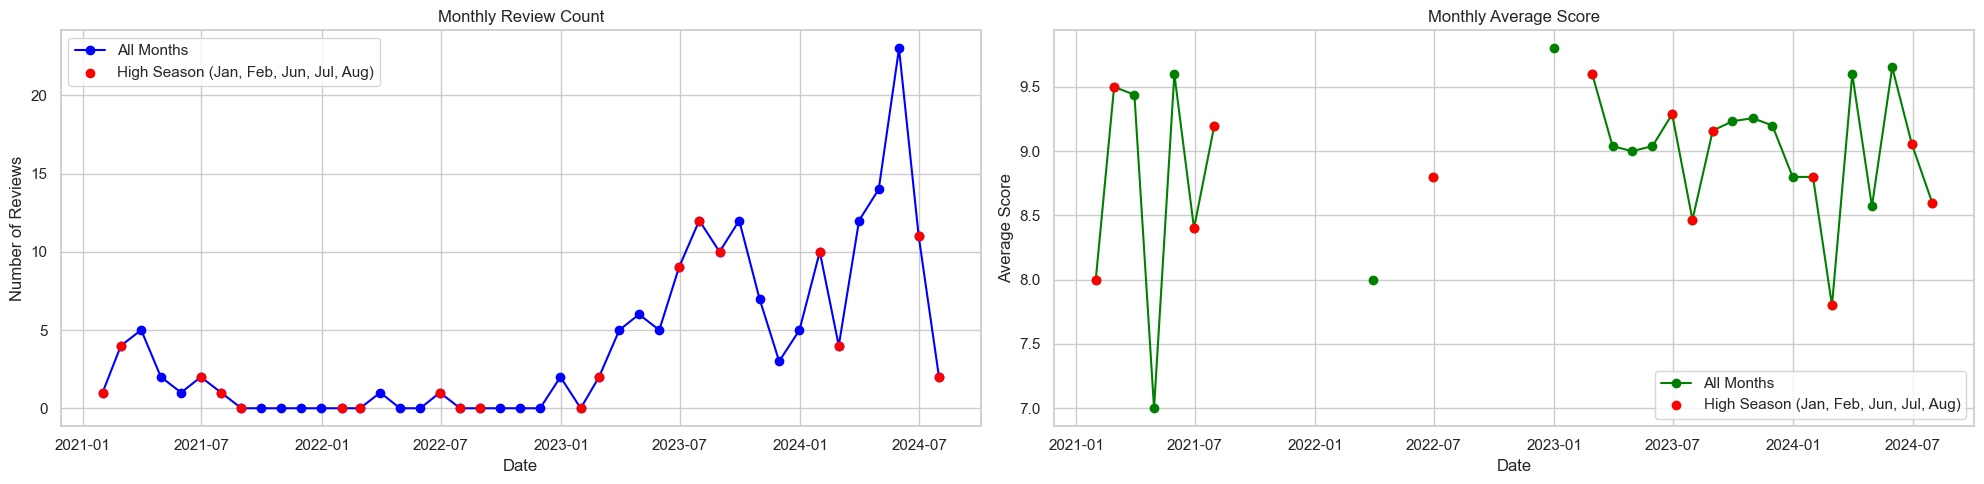

In [77]:
hotel_id = str(input("Nhập ID của Khách sạn:"))

# Filter the DataFrame for the specific Hotel ID
df_hotel_id = df[df['Hotel ID'] == hotel_id]

# Resample the data by month and aggregate review scores
reviews_time_analysis = df_hotel_id.set_index('Review Date').resample('M')['Score'].agg(['count', 'mean'])

# Define high season months
high_season_months = [1, 2, 6, 7, 8]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Plot the count of reviews per month
axs[0].plot(reviews_time_analysis.index, reviews_time_analysis['count'], marker='o', color='blue', label='All Months')
# Highlight high season months with a separate scatter plot
high_season_idx = reviews_time_analysis.index.month.isin(high_season_months)
axs[0].scatter(reviews_time_analysis.index[high_season_idx],
               reviews_time_analysis['count'][high_season_idx],
               color='red', label='High Season (Jan, Feb, Jun, Jul, Aug)', zorder=5)  # zorder to bring it on top
axs[0].set_title('Monthly Review Count')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Reviews')
axs[0].grid(True)
axs[0].legend()

# Plot the average score per month
axs[1].plot(reviews_time_analysis.index, reviews_time_analysis['mean'], marker='o', color='green', label='All Months')
# Highlight high season months with a separate scatter plot
axs[1].scatter(reviews_time_analysis.index[high_season_idx],
               reviews_time_analysis['mean'][high_season_idx],
               color='red', label='High Season (Jan, Feb, Jun, Jul, Aug)', zorder=5)  # zorder to bring it on top
axs[1].set_title('Monthly Average Score')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Score')
axs[1].grid(True)
axs[1].legend()

# Display plots
plt.tight_layout()
plt.show()

Thông tin khách sạn:
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Tên khách sạn: Khu nghỉ dưỡng Amiana Nha Trang (Amiana Resort Nha Trang)
Địa chỉ:  Nha Trang Bay, Phạm Văn Đồng , Vĩnh Hòa, Nha Trang, Việt Nam, 650000
Xếp hạng:  5.0 sao
Điểm tổng:  9.0
Vị trí:  8.6
Độ sạch sẽ:  9.3
Dịch vụ:  9.3
Tiện nghi:  9.3
Đáng giá tiền:  9.2
Sự thoải mái và chất lượng phòng:  9.2
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Business Analysis:


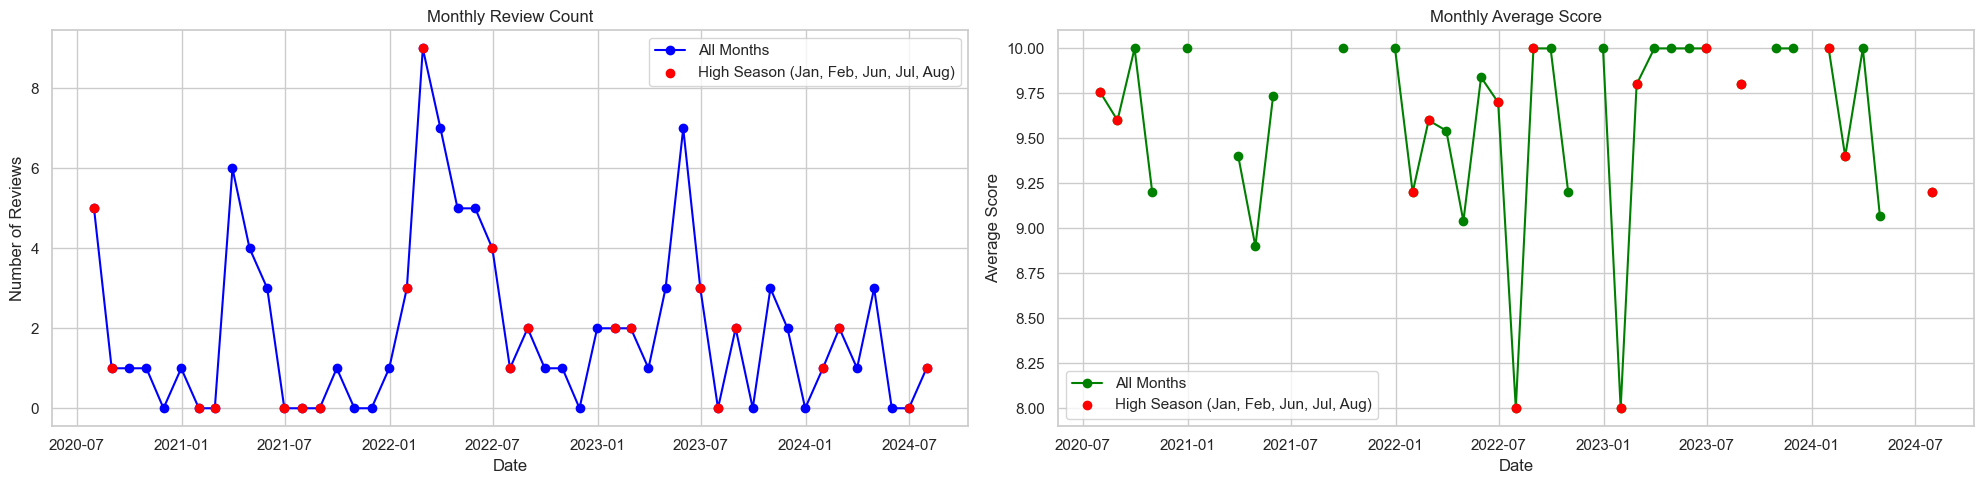

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


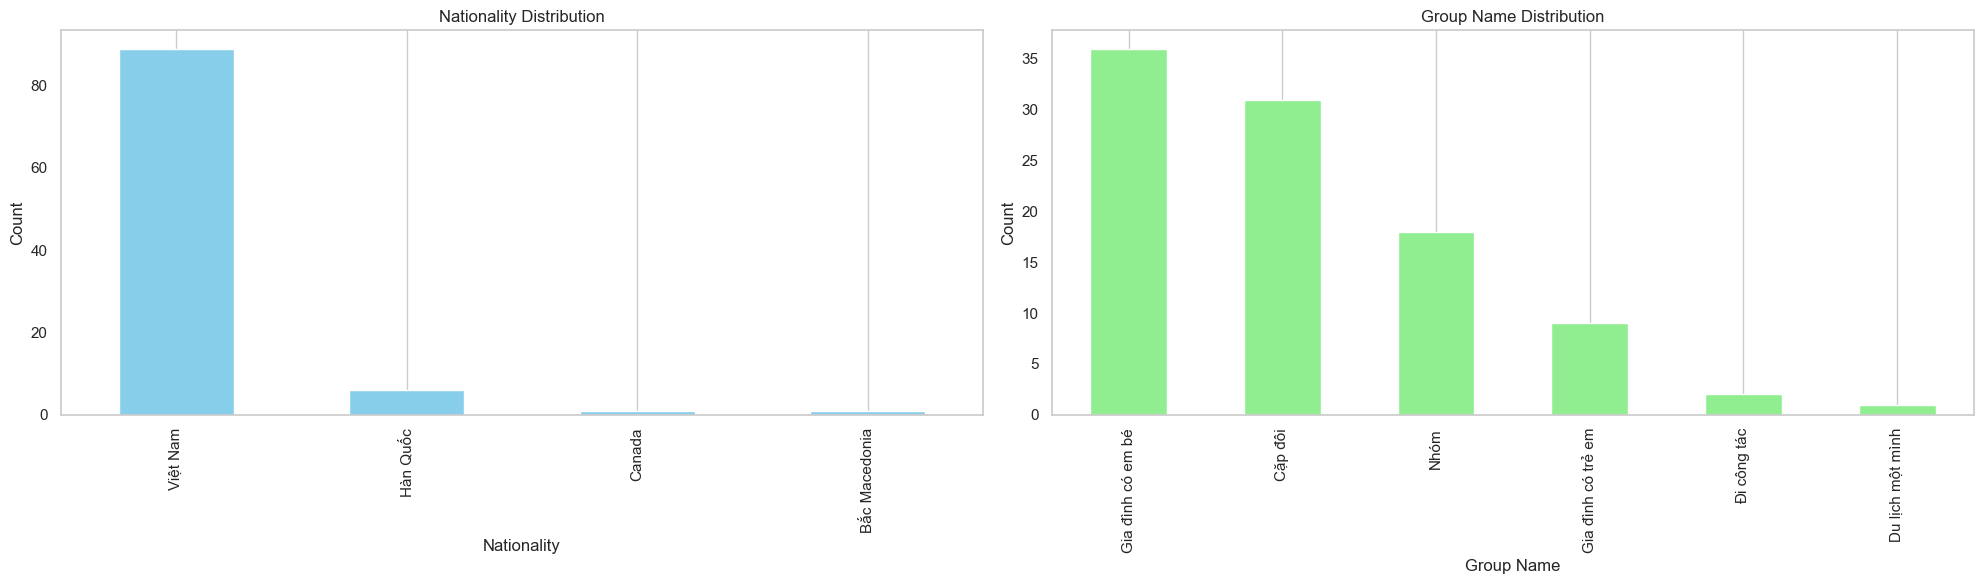

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Summary Statistics for Ratings:
 count    97.000000
mean      9.591753
std       0.834624
min       6.400000
25%       9.600000
50%      10.000000
75%      10.000000
max      10.000000
Name: Score, dtype: float64


C:\Users\hieni\AppData\Local\Temp\ipykernel_28236\2547271607.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel_id['Score Level'] = pd.cut(df_hotel_id['Score'], bins=bins, labels=labels, include_lowest=True)


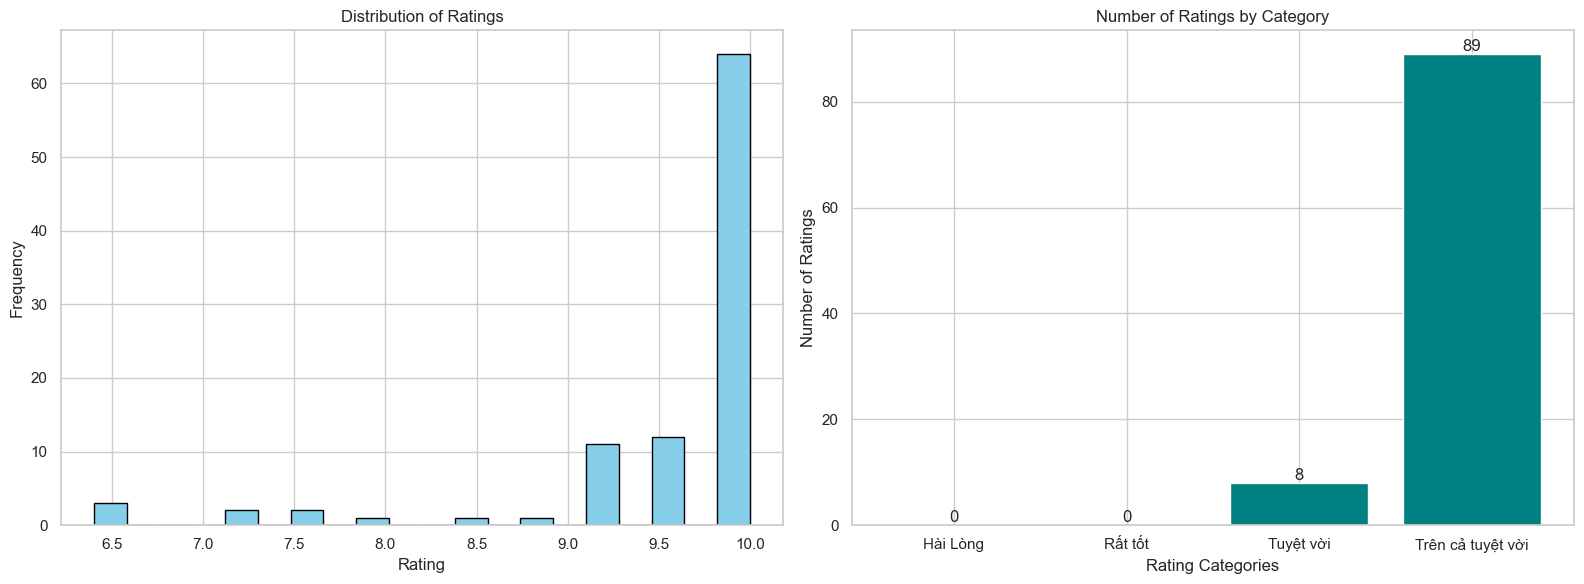

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean Score by Nationality:
 Nationality
Bắc Macedonia    10.000000
Canada           10.000000
Hàn Quốc         10.000000
Việt Nam          9.555056
Name: Score, dtype: float64
Mean Score by Group Name:
 Group Name
Du lịch một mình      10.000000
Đi công tác           10.000000
Gia đình có em bé      9.700000
Cặp đôi                9.664516
Nhóm                   9.333333
Gia đình có trẻ em     9.288889
Name: Score, dtype: float64


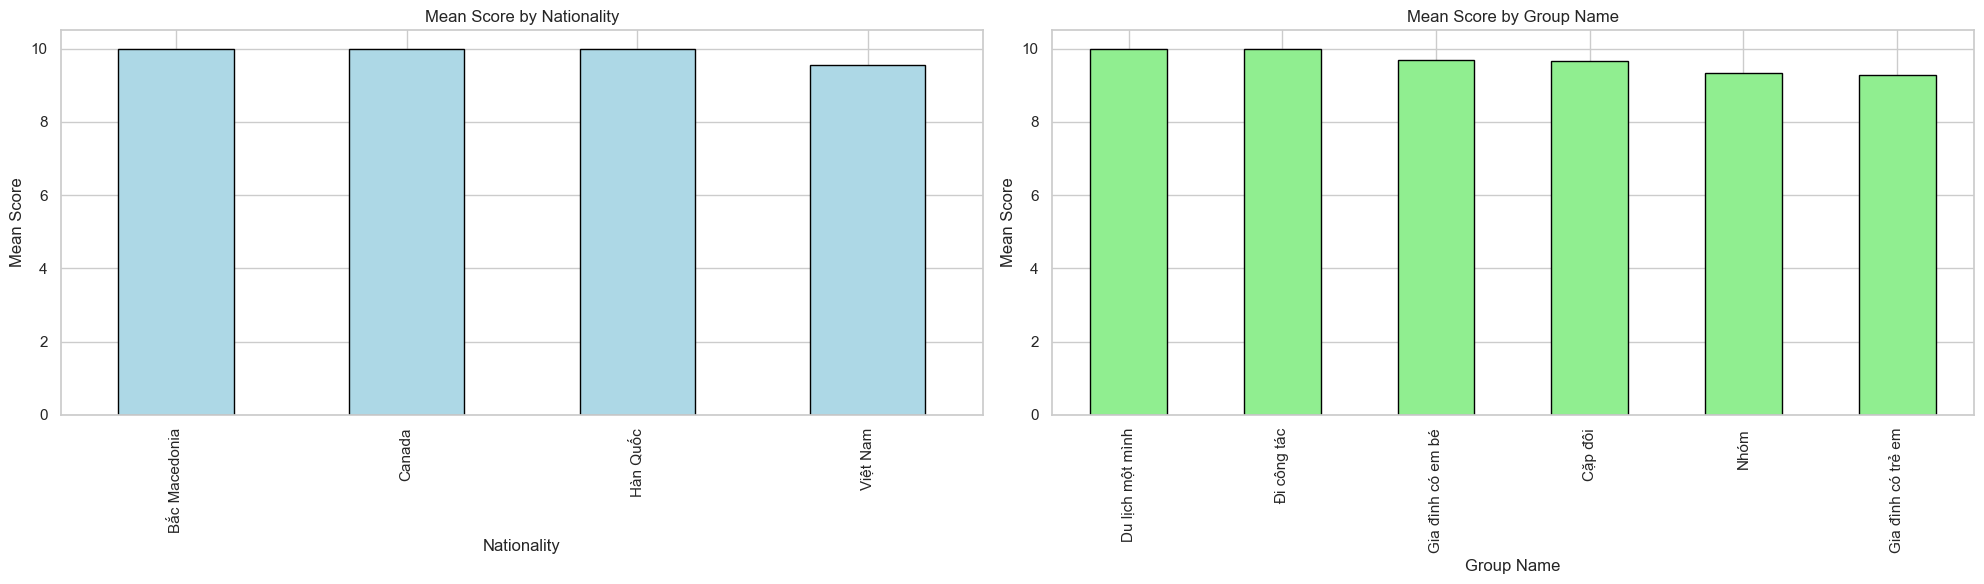

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


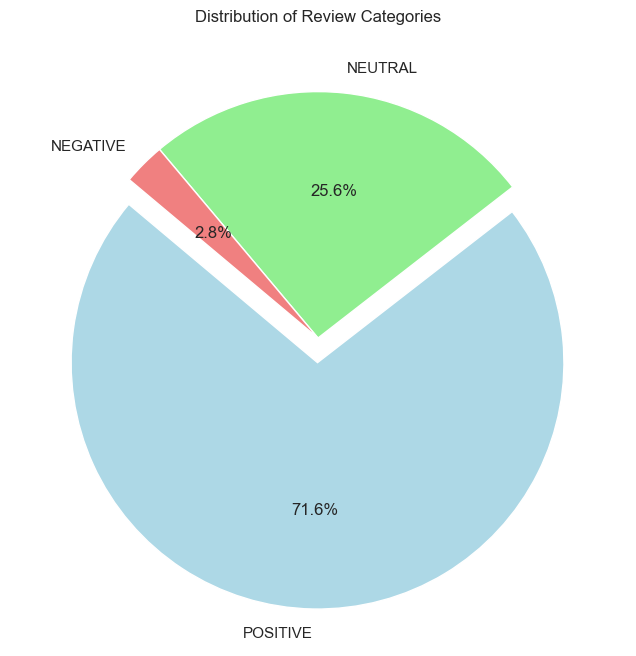

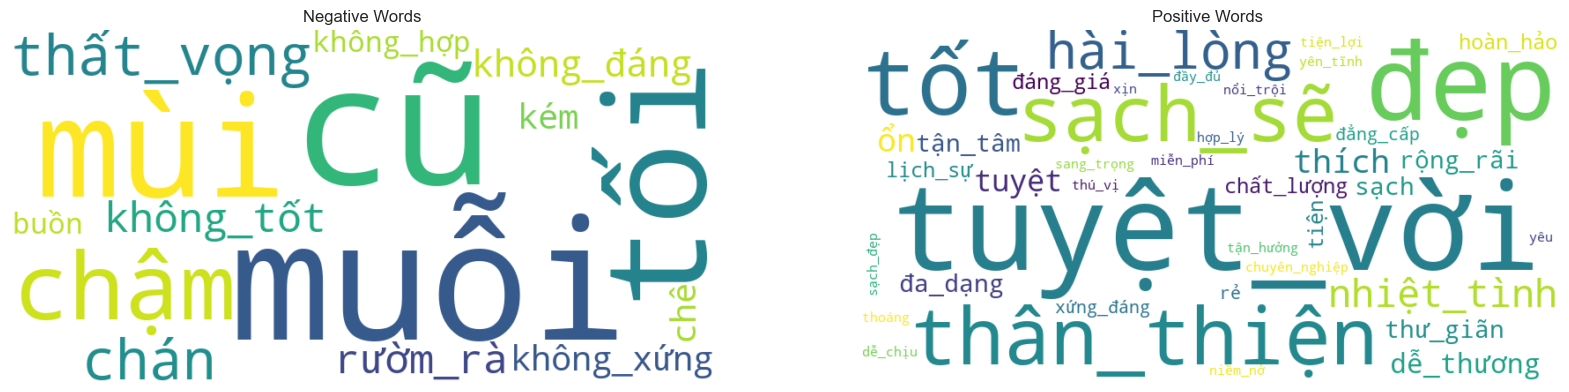

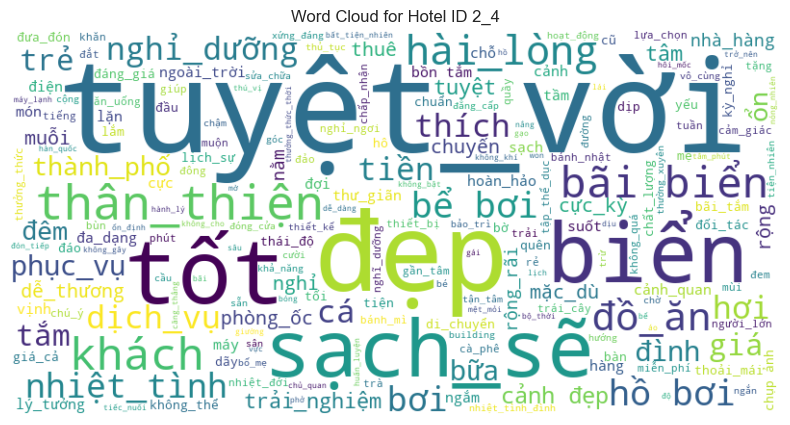

In [81]:
hotel_id = str(input("Nhập ID của Khách sạn:"))
print("Thông tin khách sạn:\n--------------------------------------------------------------------------------------------------------------------------------------------------------------------")
df_hotel_id =df[df['Hotel ID']==hotel_id]
print("Tên khách sạn:", df_hotel_id['Hotel Name'].iloc[0])
print("Địa chỉ: ", df_hotel_id['Hotel Address'].iloc[0])
print("Xếp hạng: ", df_hotel_id['Hotel Rank'].iloc[0], "sao")
print("Điểm tổng: ", df_hotel_id['Total Score'].iloc[0])
print("Vị trí: ", df_hotel_id['Vị trí'].iloc[0])
print("Độ sạch sẽ: ", df_hotel_id['Độ sạch sẽ'].iloc[0])
print("Dịch vụ: ", df_hotel_id['Dịch vụ'].iloc[0])
print("Tiện nghi: ", df_hotel_id['Tiện nghi'].iloc[0])
print("Đáng giá tiền: ", df_hotel_id['Đáng giá tiền'].iloc[0])
print("Sự thoải mái và chất lượng phòng: ", df_hotel_id['Sự thoải mái và chất lượng phòng'].iloc[0])			
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print('Business Analysis:')
# Trend theo thời gian
# Resample the data by month and aggregate review scores
reviews_time_analysis = df_hotel_id.set_index('Review Date').resample('M')['Score'].agg(['count', 'mean'])

# Define high season months
high_season_months = [1, 2, 6, 7, 8]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Plot the count of reviews per month
axs[0].plot(reviews_time_analysis.index, reviews_time_analysis['count'], marker='o', color='blue', label='All Months')
# Highlight high season months with a separate scatter plot
high_season_idx = reviews_time_analysis.index.month.isin(high_season_months)
axs[0].scatter(reviews_time_analysis.index[high_season_idx],
               reviews_time_analysis['count'][high_season_idx],
               color='red', label='High Season (Jan, Feb, Jun, Jul, Aug)', zorder=5)  # zorder to bring it on top
axs[0].set_title('Monthly Review Count')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Reviews')
axs[0].grid(True)
axs[0].legend()

# Plot the average score per month
axs[1].plot(reviews_time_analysis.index, reviews_time_analysis['mean'], marker='o', color='green', label='All Months')
# Highlight high season months with a separate scatter plot
axs[1].scatter(reviews_time_analysis.index[high_season_idx],
               reviews_time_analysis['mean'][high_season_idx],
               color='red', label='High Season (Jan, Feb, Jun, Jul, Aug)', zorder=5)  # zorder to bring it on top
axs[1].set_title('Monthly Average Score')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Score')
axs[1].grid(True)
axs[1].legend()

# Display plots
plt.tight_layout()
plt.show()
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
# Display hotel information (as in the previous code)
# Create subplots for Nationality and Group Name distributions
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot Nationality distribution
df_hotel_id['Nationality'].value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Nationality Distribution')
axs[0].set_xlabel('Nationality')
axs[0].set_ylabel('Count')
axs[0].grid(axis='y')

# Plot Group Name distribution
df_hotel_id['Group Name'].value_counts().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Group Name Distribution')
axs[1].set_xlabel('Group Name')
axs[1].set_ylabel('Count')
axs[1].grid(axis='y')

# Display plots
plt.tight_layout()
plt.show()

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
# Score
# Score trung bình
average_rating = df_hotel_id['Score'].dropna().mean()
# Summary Statistics for Score
ratings_desc = df_hotel_id['Score'].describe()
print("Summary Statistics for Ratings:\n", ratings_desc)
#Setting up the figure and axes for two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns, 16x6 inches figure
# Plotting the histogram for ratings on the first subplot
axs[0].hist(df_hotel_id['Score'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Ratings')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)
# Define bins for the rating ranges
bins = [0, 3, 5, 8, 10]  # Define the edges of the bins
labels = ['Hài Lòng', 'Rất tốt', 'Tuyệt vời', 'Trên cả tuyệt vời']  # Labels for the bins
# Categorize the ratings
df_hotel_id['Score Level'] = pd.cut(df_hotel_id['Score'], bins=bins, labels=labels, include_lowest=True)
# Count the number of ratings in each category
rating_counts = df_hotel_id['Score Level'].value_counts()
rating_counts = rating_counts.sort_index()  # Ensure the data is sorted by index for display
# Plotting the bar chart for ratings by category on the second subplot
bars = axs[1].bar(rating_counts.index, rating_counts.values, color='teal')
axs[1].set_title('Number of Ratings by Category')
axs[1].set_xlabel('Rating Categories')
axs[1].set_ylabel('Number of Ratings')
# Adding text labels on the bars
for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')  # Vertical alignment at the bottom, horizontal center alignment
# Show the plot
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
# Mean Score by Nationality
mean_score_by_nationality = df_hotel_id.groupby('Nationality')['Score'].mean().sort_values(ascending=False)
print("Mean Score by Nationality:\n", mean_score_by_nationality)

# Mean Score by Group Name
mean_score_by_group = df_hotel_id.groupby('Group Name')['Score'].mean().sort_values(ascending=False)
print("Mean Score by Group Name:\n", mean_score_by_group)

# Optionally, you can visualize these mean scores with bar plots

# Setting up the figure and axes for two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns, 20x6 inches figure

# Plotting the mean score by Nationality on the first subplot
mean_score_by_nationality.plot(kind='bar', ax=axs[0], color='lightblue', edgecolor='black')
axs[0].set_title('Mean Score by Nationality')
axs[0].set_xlabel('Nationality')
axs[0].set_ylabel('Mean Score')
axs[0].grid(True)

# Plotting the mean score by Group Name on the second subplot
mean_score_by_group.plot(kind='bar', ax=axs[1], color='lightgreen', edgecolor='black')
axs[1].set_title('Mean Score by Group Name')
axs[1].set_xlabel('Group Name')
axs[1].set_ylabel('Mean Score')
axs[1].grid(True)

# Show the plot
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")





print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
##### analyze category
category_counts = df['Label'].value_counts()
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # only "explode" the 1st slice (e.g., 'POSITIVE')

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjusts the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Adding title
plt.title('Distribution of Review Categories')

# Show the plot
plt.show()

# Function to safely parse lists from strings, handling empty and malformed strings
all_negative_words = [word for sublist in df_hotel_id['negative_word_list'] for word in sublist if sublist]
word_freq_negative = pd.Series(all_negative_words).value_counts()

#Check if there are any words to display in the word cloud
if not all_negative_words:
    print("No negative words to display.")
else:
    # Create a word cloud object
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_freq_negative)

# Function to safely parse lists from strings, handling empty and malformed strings
all_positive_words = [word for sublist in df_hotel_id['positive_word_list'] for word in sublist if sublist]
word_freq_positive = pd.Series(all_positive_words).value_counts()

# Create a word cloud object
wordcloud_positive = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_freq_positive)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Negative Words Word Cloud
axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Negative Words')

# Positive Words Word Cloud
axs[1].imshow(wordcloud_positive, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Positive Words')

plt.show()

# Generate and display a word cloud for the hotel's reviews
body_string = ' '.join(df_hotel_id['Processed Review Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(body_string)
    
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title(f"Word Cloud for Hotel ID {hotel_id}")
plt.show()